# Importing the libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

# Reading the input File

In [52]:
data=pd.read_csv('deliveries.csv',encoding='latin1')
data.head()

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0           1     legbyes          0              NaN            NaN     NaN  
1           0         NaN          0              NaN            NaN     NaN  
2           1       wides          0              NaN            NaN     NaN  
3           0         NaN          0              NaN            NaN     NaN  
4           0         NaN          0              NaN            NaN     NaN

In [53]:
data.tail()

match_id  inning           batting_team         bowling_team  over  \
260915   1426312       2  Kolkata Knight Riders  Sunrisers Hyderabad     9   
260916   1426312       2  Kolkata Knight Riders  Sunrisers Hyderabad     9   
260917   1426312       2  Kolkata Knight Riders  Sunrisers Hyderabad    10   
260918   1426312       2  Kolkata Knight Riders  Sunrisers Hyderabad    10   
260919   1426312       2  Kolkata Knight Riders  Sunrisers Hyderabad    10   

        ball   batter         bowler non_striker  batsman_runs  extra_runs  \
260915     5  SS Iyer     AK Markram     VR Iyer             1           0   
260916     6  VR Iyer     AK Markram     SS Iyer             1           0   
260917     1  VR Iyer  Shahbaz Ahmed     SS Iyer             1           0   
260918     2  SS Iyer  Shahbaz Ahmed     VR Iyer             1           0   
260919     3  VR Iyer  Shahbaz Ahmed     SS Iyer             1           0   

        total_runs extras_type  is_wicket player_dismissed dismissal_kind  \
260915           1         NaN          0              NaN            NaN   
260916           1         NaN          0              NaN            NaN   
260917           1         NaN          0              NaN            NaN   
260918           1         NaN          0              NaN            NaN   
260919           1         NaN          0              NaN            NaN   

       fielder  
260915     NaN  
260916     NaN  
260917     NaN  
260918     NaN  
260919     NaN

In [153]:
data.shape

(577, 22)

In [63]:
# Matches dataset 
data1=pd.read_csv('matches.csv')
data1.head()

id  season        city        date                  team1  \
0   1    2008   Bangalore  2008-04-18  Kolkata Knight Riders   
1   2    2008  Chandigarh  2008-04-19    Chennai Super Kings   
2   3    2008       Delhi  2008-04-19       Rajasthan Royals   
3   4    2008      Mumbai  2008-04-20         Mumbai Indians   
4   5    2008     Kolkata  2008-04-20        Deccan Chargers   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1              Kings XI Punjab          Chennai Super Kings           bat   
2             Delhi Daredevils             Rajasthan Royals           bat   
3  Royal Challengers Bangalore               Mumbai Indians           bat   
4        Kolkata Knight Riders              Deccan Chargers           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0        Kolkata Knight Riders          140   
1  normal           0          Chennai Super Kings           33   
2  normal           0             Delhi Daredevils            0   
3  normal           0  Royal Challengers Bangalore            0   
4  normal           0        Kolkata Knight Riders            0   

   win_by_wickets player_of_match                                       venue  \
0               0     BB McCullum                       M Chinnaswamy Stadium   
1               0      MEK Hussey  Punjab Cricket Association Stadium, Mohali   
2               9     MF Maharoof                            Feroz Shah Kotla   
3               5      MV Boucher                            Wankhede Stadium   
4               5       DJ Hussey                                Eden Gardens   

     umpire1         umpire2  umpire3  
0  Asad Rauf     RE Koertzen      NaN  
1  MR Benson      SL Shastri      NaN  
2  Aleem Dar  GA Pratapkumar      NaN  
3   SJ Davis       DJ Harper      NaN  
4  BF Bowden     K Hariharan      NaN

In [64]:
data1.tail()

id  season       city        date                team1  \
572  573    2016     Raipur  2016-05-22     Delhi Daredevils   
573  574    2016  Bangalore  2016-05-24        Gujarat Lions   
574  575    2016      Delhi  2016-05-25  Sunrisers Hyderabad   
575  576    2016      Delhi  2016-05-27        Gujarat Lions   
576  577    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
572  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
573  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
574        Kolkata Knight Riders        Kolkata Knight Riders         field   
575          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
576  Royal Challengers Bangalore          Sunrisers Hyderabad           bat   

     result  dl_applied                       winner  win_by_runs  \
572  normal           0  Royal Challengers Bangalore            0   
573  normal           0  Royal Challengers Bangalore            0   
574  normal           0          Sunrisers Hyderabad           22   
575  normal           0          Sunrisers Hyderabad            0   
576  normal           0          Sunrisers Hyderabad            8   

     win_by_wickets player_of_match  \
572               6         V Kohli   
573               4  AB de Villiers   
574               0    MC Henriques   
575               4       DA Warner   
576               0     BCJ Cutting   

                                                venue          umpire1  \
572  Shaheed Veer Narayan Singh International Stadium   A Nand Kishore   
573                             M Chinnaswamy Stadium     AK Chaudhary   
574                                  Feroz Shah Kotla        M Erasmus   
575                                  Feroz Shah Kotla        M Erasmus   
576                             M Chinnaswamy Stadium  HDPK Dharmasena   

             umpire2  umpire3  
572     BNJ Oxenford      NaN  
573  HDPK Dharmasena      NaN  
574    C Shamshuddin      NaN  
575        CK Nandan      NaN  
576     BNJ Oxenford      NaN

In [158]:
merge = pd.merge(data, data1, on='id')
merge.head(2)

id  season_x      city_x      date_x                team1_x  \
0   1      2008   Bangalore  2008-04-18  Kolkata Knight Riders   
1   2      2008  Chandigarh  2008-04-19    Chennai Super Kings   

                       team2_x                toss_winner_x toss_decision_x  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore           field   
1              Kings XI Punjab          Chennai Super Kings             bat   

  result_x  dl_applied_x  ... result_y  dl_applied_y               winner_y  \
0   normal             0  ...   normal             0  Kolkata Knight Riders   
1   normal             0  ...   normal             0    Chennai Super Kings   

  win_by_runs_y win_by_wickets_y player_of_match_y  \
0           140                0       BB McCullum   
1            33                0        MEK Hussey   

                              venue_y  umpire1_y    umpire2_y  umpire3_y  
0              M. Chinnaswamy Stadium  Asad Rauf  RE Koertzen        NaN  
1  Punjab Cricket Association Stadium  MR Benson   SL Shastri        NaN  

[2 rows x 39 columns]

In [159]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    577 non-null    int64  
 1   season_x              577 non-null    int64  
 2   city_x                570 non-null    object 
 3   date_x                577 non-null    object 
 4   team1_x               577 non-null    object 
 5   team2_x               577 non-null    object 
 6   toss_winner_x         577 non-null    object 
 7   toss_decision_x       577 non-null    object 
 8   result_x              577 non-null    object 
 9   dl_applied_x          577 non-null    int64  
 10  winner_x              574 non-null    object 
 11  win_by_runs_x         577 non-null    int64  
 12  win_by_wickets_x      577 non-null    int64  
 13  player_of_match_x     574 non-null    object 
 14  venue_x               577 non-null    object 
 15  umpire1_x             5

In [160]:
merge.describe()

id     season_x  dl_applied_x  win_by_runs_x  win_by_wickets_x  \
count  577.000000   577.000000    577.000000     577.000000        577.000000   
mean   289.000000  2012.029463      0.025997      13.715771          3.363951   
std    166.709828     2.486247      0.159263      23.619282          3.416049   
min      1.000000  2008.000000      0.000000       0.000000          0.000000   
25%    145.000000  2010.000000      0.000000       0.000000          0.000000   
50%    289.000000  2012.000000      0.000000       0.000000          3.000000   
75%    433.000000  2014.000000      0.000000      20.000000          6.000000   
max    577.000000  2016.000000      1.000000     144.000000         10.000000   

       umpire3_x  toss_winner_encoded  batting_team_encoded  \
count        0.0           577.000000            577.000000   
mean         NaN             5.634315              5.601386   
std          NaN             3.766593              3.873055   
min          NaN             0.000000              0.000000   
25%          NaN             2.000000              2.000000   
50%          NaN             6.000000              6.000000   
75%          NaN             9.000000              9.000000   
max          NaN            12.000000             12.000000   

       bowling_team_encoded  venue_encoded     season_y  dl_applied_y  \
count            577.000000     577.000000   577.000000    577.000000   
mean               5.854419      16.951473  2012.029463      0.025997   
std                3.723464       9.204528     2.486247      0.159263   
min                0.000000       0.000000  2008.000000      0.000000   
25%                2.000000       8.000000  2010.000000      0.000000   
50%                6.000000      15.000000  2012.000000      0.000000   
75%                9.000000      24.000000  2014.000000      0.000000   
max               12.000000      33.000000  2016.000000      1.000000   

       win_by_runs_y  win_by_wickets_y  umpire3_y  
count     577.000000        577.000000        0.0  
mean       13.715771          3.363951        NaN  
std        23.619282          3.416049        NaN  
min         0.000000          0.000000        NaN  
25%         0.000000          0.000000        NaN  
50%         0.000000          3.000000        NaN  
75%        20.000000          6.000000        NaN  
max       144.000000         10.000000        NaN

In [162]:
data1.id.is_unique

True

In [167]:
data1.describe(include = 'all')

season    city        date                team1  \
count    577.000000     570         577                  577   
unique          NaN      30         407                   13   
top             NaN  Mumbai  2011-04-17  Chennai Super Kings   
freq            NaN      77           2                   77   
mean    2012.029463     NaN         NaN                  NaN   
std        2.486247     NaN         NaN                  NaN   
min     2008.000000     NaN         NaN                  NaN   
25%     2010.000000     NaN         NaN                  NaN   
50%     2012.000000     NaN         NaN                  NaN   
75%     2014.000000     NaN         NaN                  NaN   
max     2016.000000     NaN         NaN                  NaN   

                              team2     toss_winner toss_decision  result  \
count                           577             577           577     577   
unique                           13              13             2       3   
top     Royal Challengers Bangalore  Mumbai Indians         field  normal   
freq                             77              74           315     568   
mean                            NaN             NaN           NaN     NaN   
std                             NaN             NaN           NaN     NaN   
min                             NaN             NaN           NaN     NaN   
25%                             NaN             NaN           NaN     NaN   
50%                             NaN             NaN           NaN     NaN   
75%                             NaN             NaN           NaN     NaN   
max                             NaN             NaN           NaN     NaN   

        dl_applied          winner  win_by_runs  win_by_wickets  \
count   577.000000             574   577.000000      577.000000   
unique         NaN              13          NaN             NaN   
top            NaN  Mumbai Indians          NaN             NaN   
freq           NaN              80          NaN             NaN   
mean      0.025997             NaN    13.715771        3.363951   
std       0.159263             NaN    23.619282        3.416049   
min       0.000000             NaN     0.000000        0.000000   
25%       0.000000             NaN     0.000000        0.000000   
50%       0.000000             NaN     0.000000        3.000000   
75%       0.000000             NaN    20.000000        6.000000   
max       1.000000             NaN   144.000000       10.000000   

       player_of_match                   venue          umpire1     umpire2  \
count              574                     577              577         577   
unique             187                      34               43          45   
top           CH Gayle  M. Chinnaswamy Stadium  HDPK Dharmasena  SJA Taufel   
freq                17                      58               73          54   
mean               NaN                     NaN              NaN         NaN   
std                NaN                     NaN              NaN         NaN   
min                NaN                     NaN              NaN         NaN   
25%                NaN                     NaN              NaN         NaN   
50%                NaN                     NaN              NaN         NaN   
75%                NaN                     NaN              NaN         NaN   
max                NaN                     NaN              NaN         NaN   

        umpire3  
count       0.0  
unique      NaN  
top         NaN  
freq        NaN  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [177]:
data.set_index('id', inplace=True)

In [171]:
data1[data1.city.isnull()][['city','venue']]

city                                venue
id                                           
403  NaN  Dubai International Cricket Stadium
404  NaN  Dubai International Cricket Stadium
408  NaN  Dubai International Cricket Stadium
410  NaN  Dubai International Cricket Stadium
411  NaN  Dubai International Cricket Stadium
416  NaN  Dubai International Cricket Stadium
418  NaN  Dubai International Cricket Stadium

In [178]:
data1.city = data1.city.fillna('Dubai')
data1[(data1.umpire1.isnull()) | (data1.umpire2.isnull())]

Empty DataFrame
Columns: [season, city, date, team1, team2, toss_winner, toss_decision, result, dl_applied, winner, win_by_runs, win_by_wickets, player_of_match, venue, umpire1, umpire2, umpire3]
Index: []

In [180]:
city_venue = data1.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M. Chinnaswamy Stadium                                  58
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association Stadium                      42
Chennai        M.A. Chidambaram Stadium                                48
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        53
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium                      41
Indore         Holkar Cricket Stadium                                   2
Jaipur         Sawai Mansingh Stadium                                  33
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               2
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            54
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        49
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                  8
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                   5
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

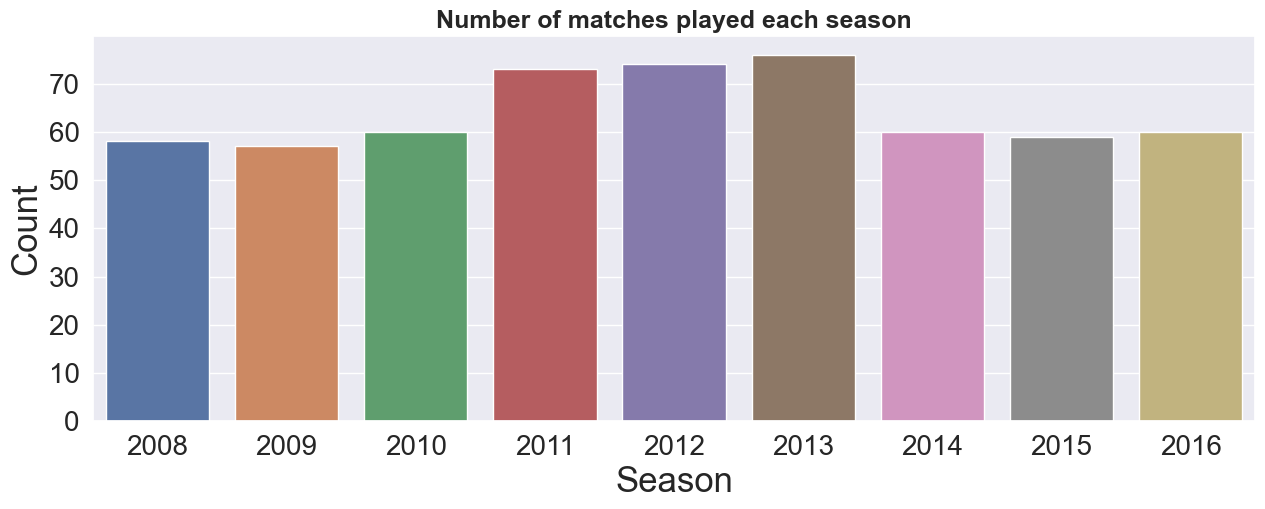

In [187]:
plt.figure(figsize=(15,5))
sns.countplot(x='season', data=data1)
plt.title("Number of matches played each season", fontsize=18, fontweight="bold")
plt.ylabel("Count", fontsize=25)
plt.xlabel("Season", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [188]:
data1.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

In [89]:
# Data Cleaning
data1['team1'] = data1['team1'].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True)
data1['team2'] = data1['team2'].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True)
data1['winner'] = data1['winner'].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True)

data1['venue'] = data1['venue'].replace({
    'Feroz Shah Kotla Ground': 'Feroz Shah Kotla',
    'M Chinnaswamy Stadium': 'M. Chinnaswamy Stadium',
    'MA Chidambaram Stadium, Chepauk': 'M.A. Chidambaram Stadium',
    'M. A. Chidambaram Stadium': 'M.A. Chidambaram Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association Stadium',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association Stadium',
    'IS Bindra Stadium': 'Punjab Cricket Association Stadium',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi Intl. Cricket Stadium': 'Rajiv Gandhi International Stadium'
}, regex=True)


In [87]:
# Top Cities that have hosted IPL Matches

Top 15 Cities with the most IPL Matches Played:
               city  Total Matches
21          Mumbai             77
2        Bangalore             58
20         Kolkata             54
9            Delhi             53
7          Chennai             48
6       Chandigarh             42
13       Hyderabad             41
15          Jaipur             33
24            Pune             25
11          Durban             15
5        Centurion             12
1        Ahmedabad             12
29   Visakhapatnam             11
10      Dharamsala              9
16    Johannesburg              8
4        Cape Town              7
8          Cuttack              7
27          Ranchi              7
23  Port Elizabeth              7
0        Abu Dhabi              7


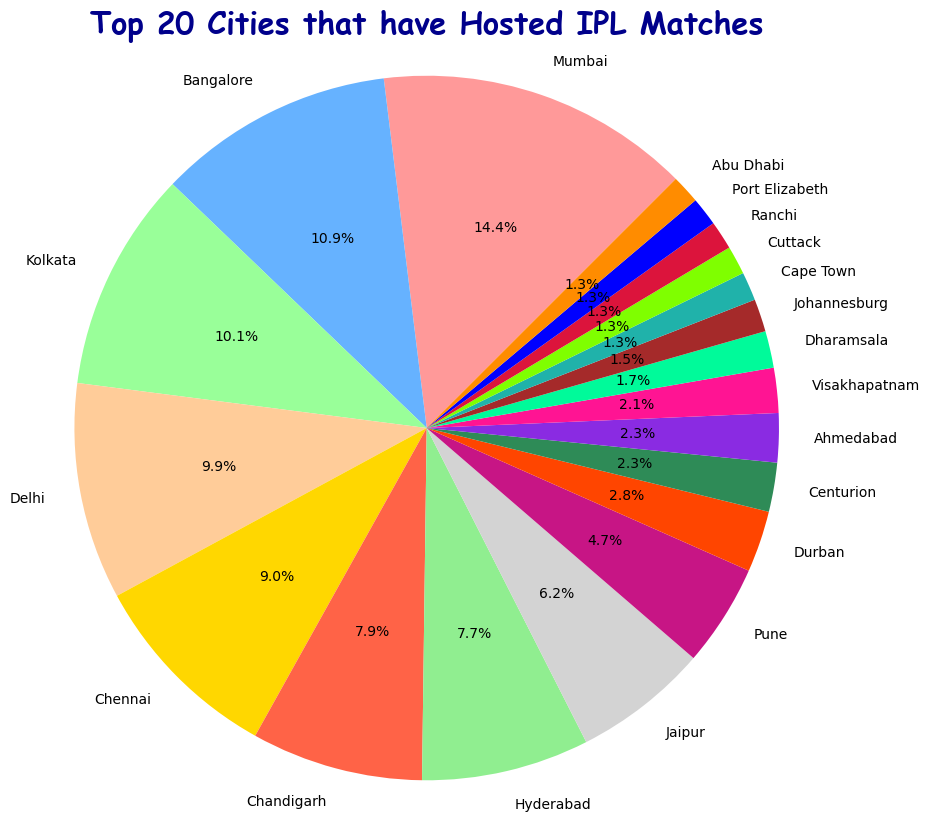

In [91]:
city_summary = data1.groupby('city').size().reset_index(name='Total Matches')
ranked_cities = city_summary.sort_values(by='Total Matches', ascending=False)
top_20_cities_list = ranked_cities.head(20)

print('Top 15 Cities with the most IPL Matches Played:\n', top_20_cities_list)

plt.figure(figsize=(10, 10))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347', '#90EE90', '#D3D3D3', '#C71585', '#FF4500',
          '#2E8B57', '#8A2BE2', '#FF1493', '#00FA9A', '#A52A2A', '#20B2AA', '#7FFF00', '#DC143C', '#0000FF', '#FF8C00']

plt.pie(top_20_cities_list['Total Matches'], labels=top_20_cities_list['city'], autopct='%1.1f%%', startangle=45, colors=colors)
plt.axis('equal')

plt.title('Top 20 Cities that have Hosted IPL Matches', fontsize=22, fontweight='bold', family='Comic Sans MS', color='darkblue')

plt.show()


In [ ]:
# Top Stadiums that have hosted IPL Matches

Top 20 Stadiums with the most IPL Matches Played:
                                                 venue  Matches Hosted
14                             M. Chinnaswamy Stadium              58
7                                        Eden Gardens              54
8                                    Feroz Shah Kotla              53
33                                   Wankhede Stadium              49
15                           M.A. Chidambaram Stadium              48
21                 Punjab Cricket Association Stadium              42
22                 Rajiv Gandhi International Stadium              41
25                             Sawai Mansingh Stadium              33
4                          Dr DY Patil Sports Academy              17
30                         Subrata Roy Sahara Stadium              17
13                                          Kingsmead              15
23                       Sardar Patel Stadium, Motera              12
31                                    S

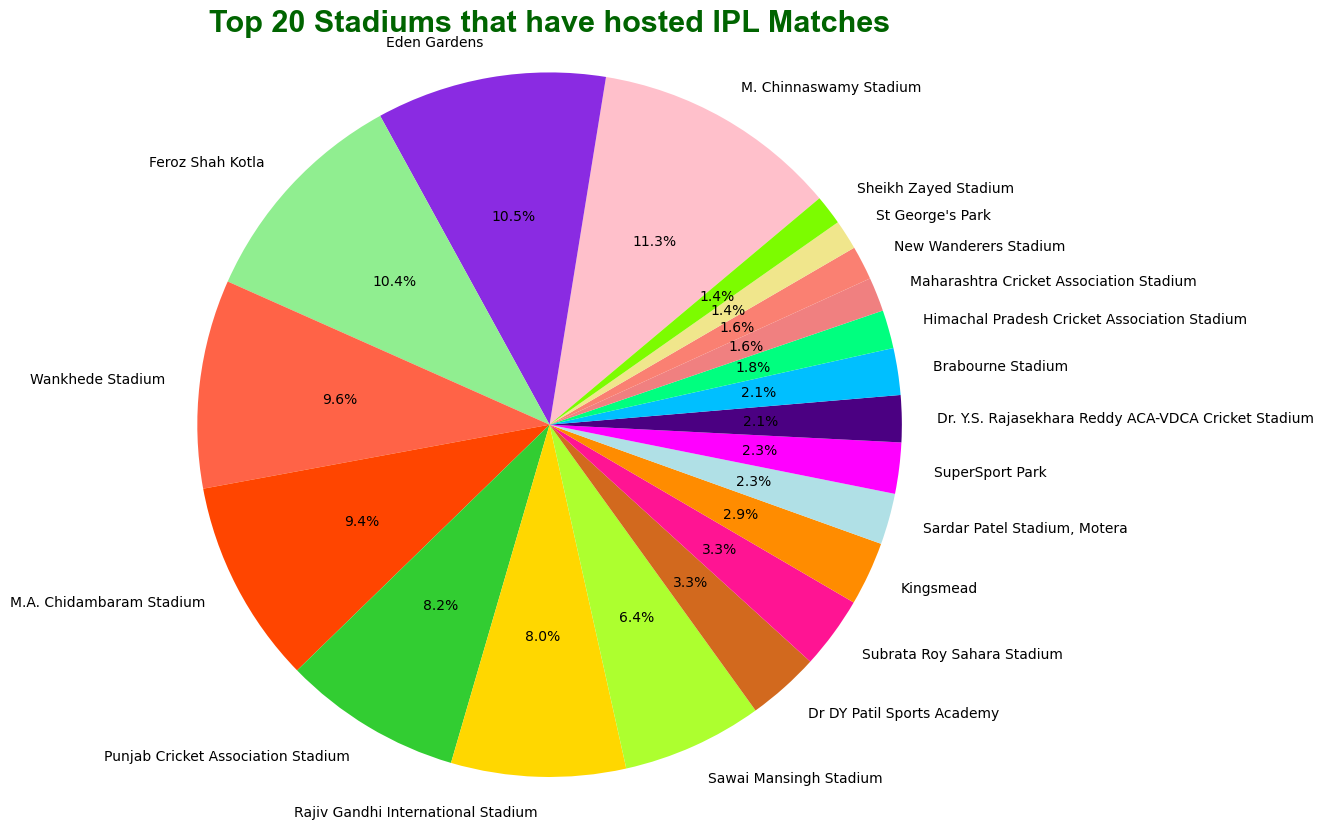

In [92]:
venue_match_count = data1.groupby('venue').size().reset_index(name='Matches Hosted')
sorted_venues = venue_match_count.sort_values(by='Matches Hosted', ascending=False)
top_20_venues = sorted_venues.head(20)

print('Top 20 Stadiums with the most IPL Matches Played:\n', top_20_venues)

plt.figure(figsize=(10, 10))
colors_venues = ['#FFC0CB', '#8A2BE2', '#90EE90', '#FF6347', '#FF4500', '#32CD32', '#FFD700', '#ADFF2F', '#D2691E', '#FF1493',
                 '#FF8C00', '#B0E0E6', '#FF00FF', '#4B0082', '#00BFFF', '#00FF7F', '#F08080', '#FA8072', '#F0E68C', '#7CFC00']

plt.pie(top_20_venues['Matches Hosted'], labels=top_20_venues['venue'], autopct='%1.1f%%', startangle=40, colors=colors_venues)
plt.axis('equal')

plt.title('Top 20 Stadiums that have hosted IPL Matches', fontsize=22, fontweight='bold', family='Arial', color='darkgreen')

plt.show()


In [191]:
#creating a dataframe with season and winner columns
winning_teams = data1[['season','winner']]

In [193]:
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Chennai Super Kings'),
  Text(0, 1, 'Kolkata Knight Riders'),
  Text(0, 2, 'Mumbai Indians'),
  Text(0, 3, 'Rajasthan Royals'),
  Text(0, 4, 'Deccan Chargers'),
  Text(0, 5, 'Sunrisers Hyderabad')])

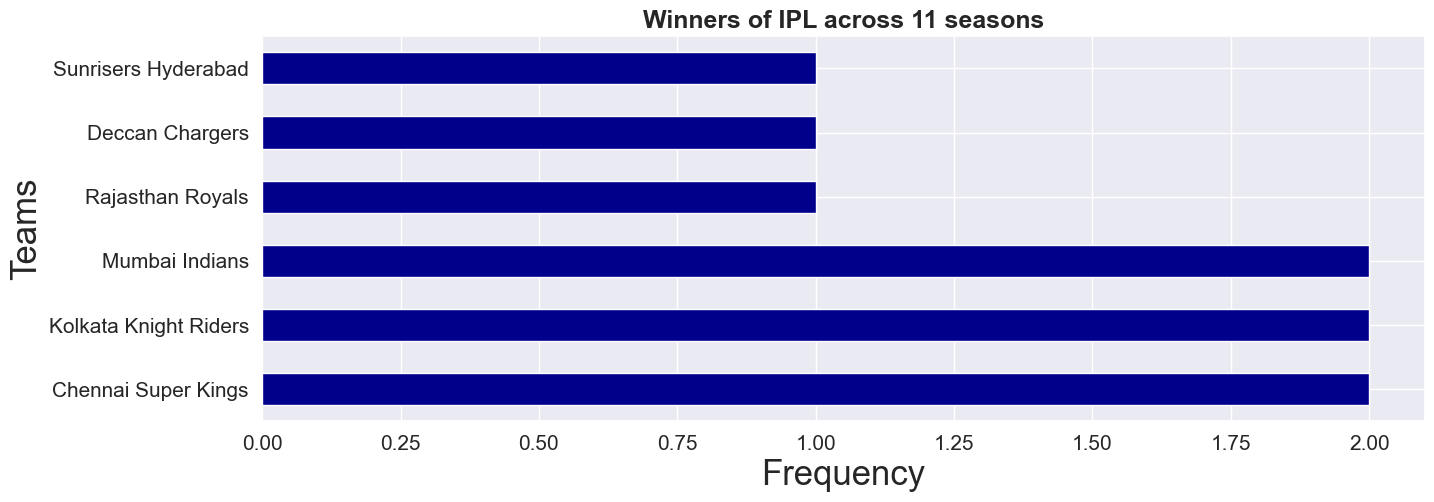

In [194]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'darkblue')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

In [196]:
data1['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,7), shadow=True, startangle=135, legend=True, cmap='Oranges')

plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data1['toss_win_game_win'] = np.where((data1.toss_winner == data1.winner), 'Yes', 'No')

plt.figure(figsize=(15, 5))
sns.countplot(x='toss_win_game_win', data=data1, hue='toss_decision')

plt.title("How Toss Decision affects match result", fontsize=18, fontweight="bold")
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Winning Toss and winning match", fontsize=25)
plt.ylabel("Frequency", fontsize=25)

plt.show()

In [218]:
plt.figure(figsize=(25, 10))
sns.countplot(x='toss_winner', data=data1, hue='toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size=28, fontweight='bold')
plt.xticks(size=10)
plt.yticks(size=15)
plt.xlabel("Toss Winner", size=32)
plt.ylabel("Count", size=32)
plt.show()

In [208]:
MoM = data1['player_of_match'].value_counts()
MoM.head(10).plot(kind='bar', figsize=(12, 8), fontsize=15, color='royalblue')
plt.title("Top 10 players with most MoM awards", fontsize=18, fontweight="bold")
plt.ylabel("Frequency", size=25)
plt.xlabel("Players", size=25)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16852\2136022018.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Venue')

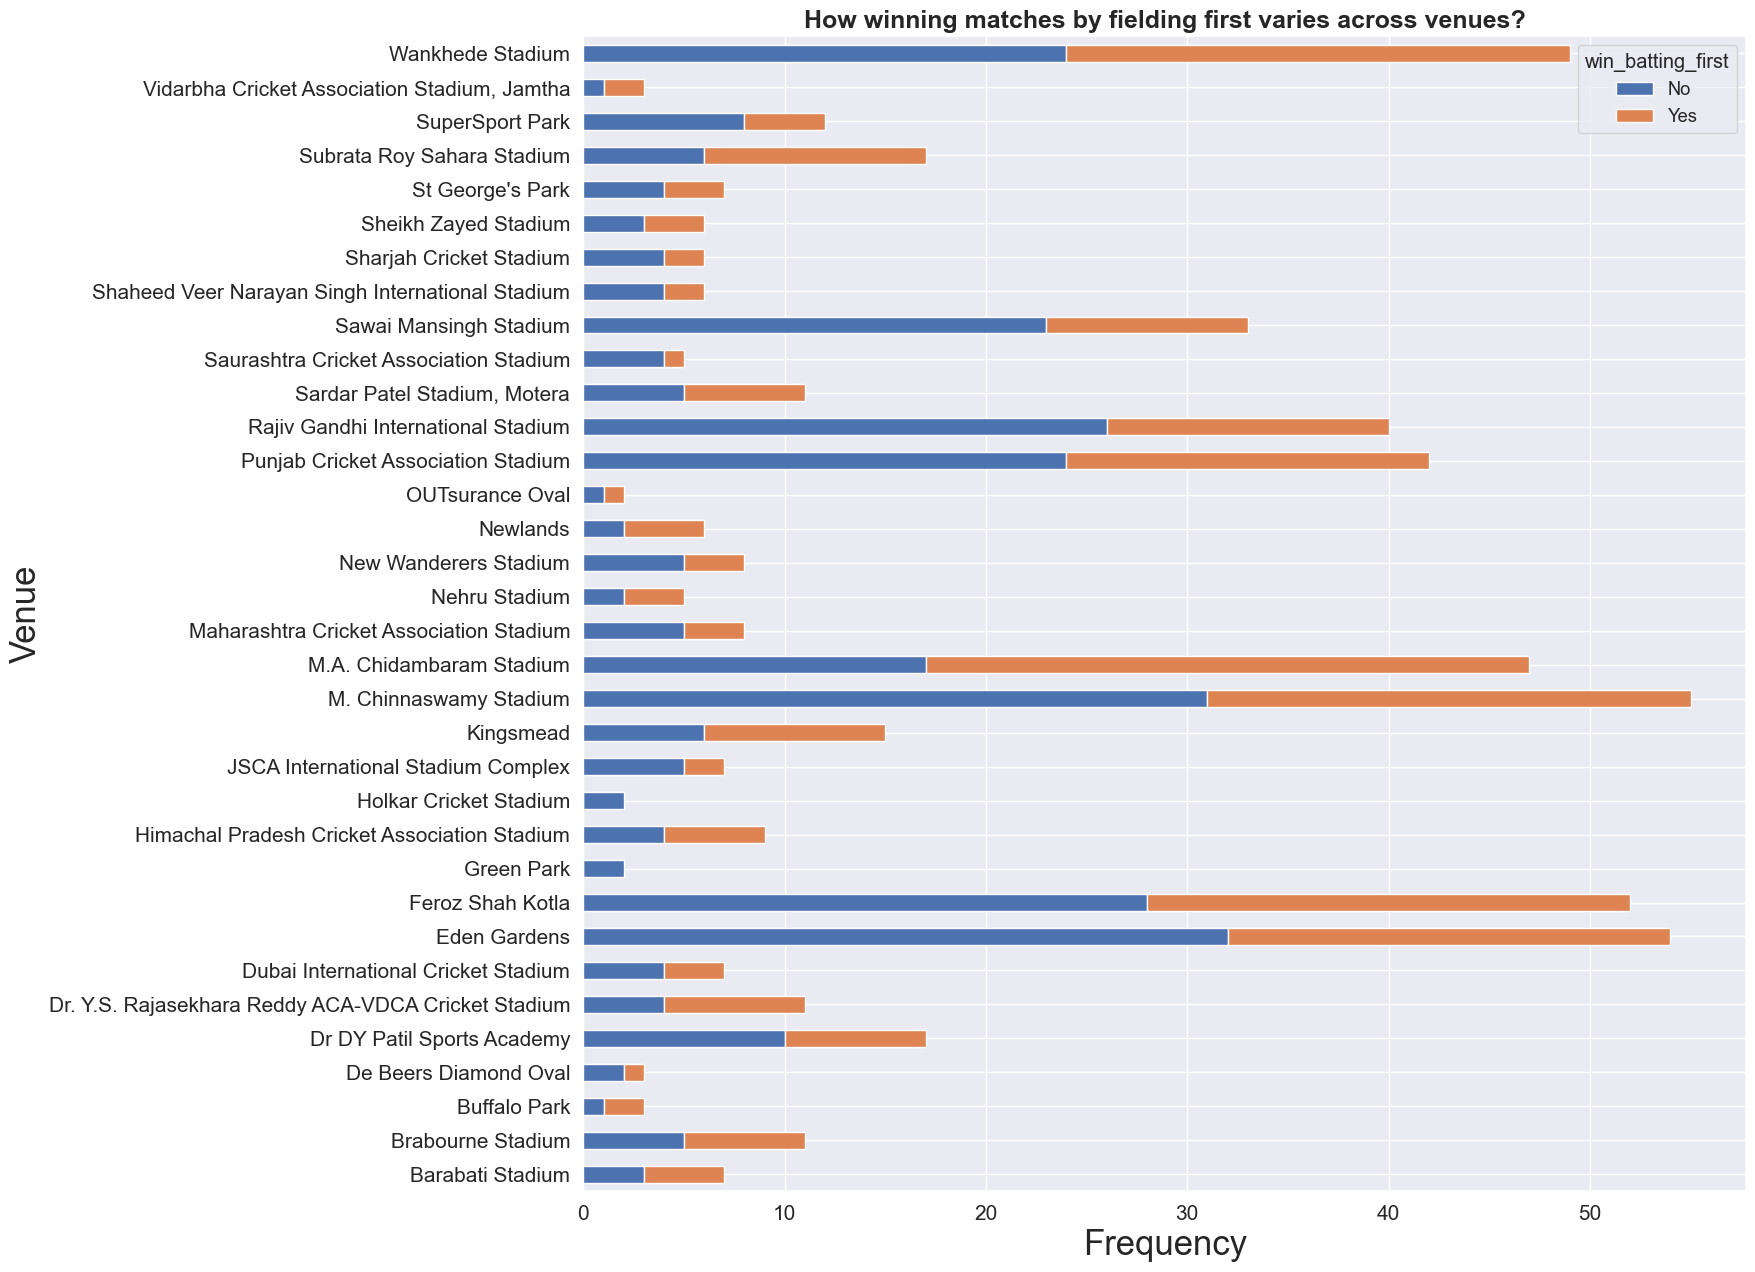

In [210]:
new_matches = data1[data1['result'] == 'normal']   #taking all those matches where result is normal and creating a new dataframe
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'barh', stacked = True,
                                                                               figsize=(15,15))
plt.title("How winning matches by fielding first varies across venues?", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Frequency", fontsize = 25)
plt.ylabel("Venue", fontsize = 25)

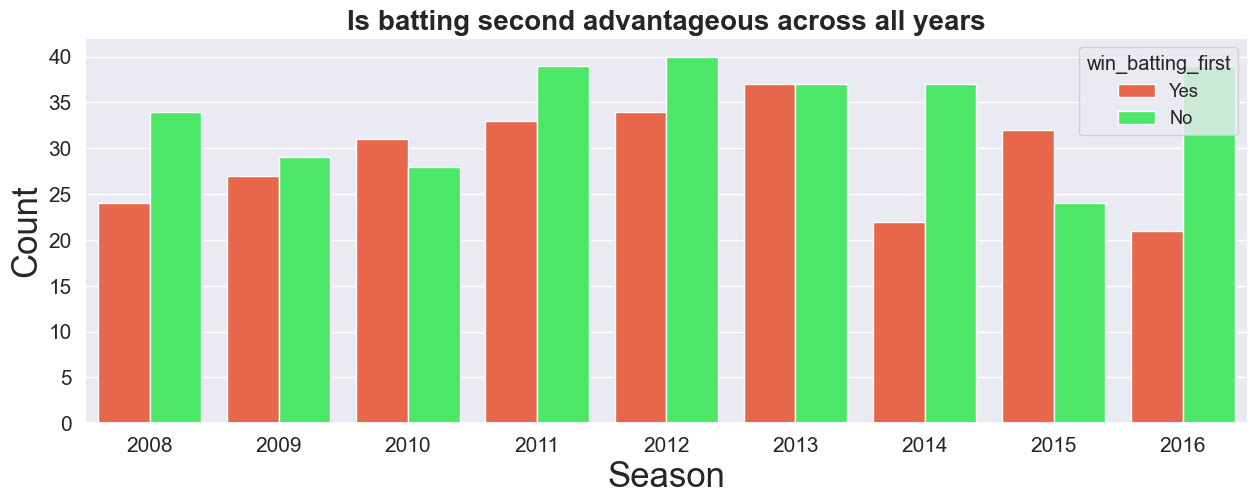

In [216]:
plt.figure(figsize=(15, 5))
sns.countplot(x='season', data=new_matches, hue='win_batting_first', palette=['#FF5733', '#33FF57'])
plt.title("Is batting second advantageous across all years", fontsize=20, fontweight="bold")
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Season", fontsize=25)
plt.ylabel("Count", fontsize=25)
plt.show()

In [ ]:
# Top 10 Batsmen in IPL - Seasons 2008-2019

In [96]:
batting_tot=file.groupby('batter').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
print('The Top 10 Batsmen in thr Tournament are:\n',top_batsmen)
# Correct column names in the bar plot
fig = px.bar(top_batsmen, x='batter', y='Runs',
             hover_data=['batter'], color='Runs',
             title='Top 10 Batsmen in IPL - Seasons 2008-2019')
fig.show()

The Top 10 Batsmen in thr Tournament are:
              batter  Runs
631         V Kohli  8014
512        S Dhawan  6769
477       RG Sharma  6630
147       DA Warner  6567
546        SK Raina  5536
374        MS Dhoni  5243
30   AB de Villiers  5181
124        CH Gayle  4997
501      RV Uthappa  4954
282      KD Karthik  4843


In [ ]:
# IPL Best batting performances in a Match

The Top 10 Batting Performances in the IPL History are:
              batter  Innings Runs  Balls Faced  Strike Rate for Match  inning  \
0          CH Gayle           175           69             253.623188       1   
69      BB McCullum           158           77             205.194805       1   
146       Q de Kock           140           71             197.183099       1   
217  AB de Villiers           133           61             218.032787       1   
278        KL Rahul           132           70             188.571429       1   
348    Shubman Gill           129           63             204.761905       1   
411  AB de Villiers           129           53             243.396226       1   
464        CH Gayle           128           62             206.451613       1   
526         RR Pant           128           64             200.000000       1   
590         M Vijay           127           57             222.807018       1   

                    batting_team                 bo

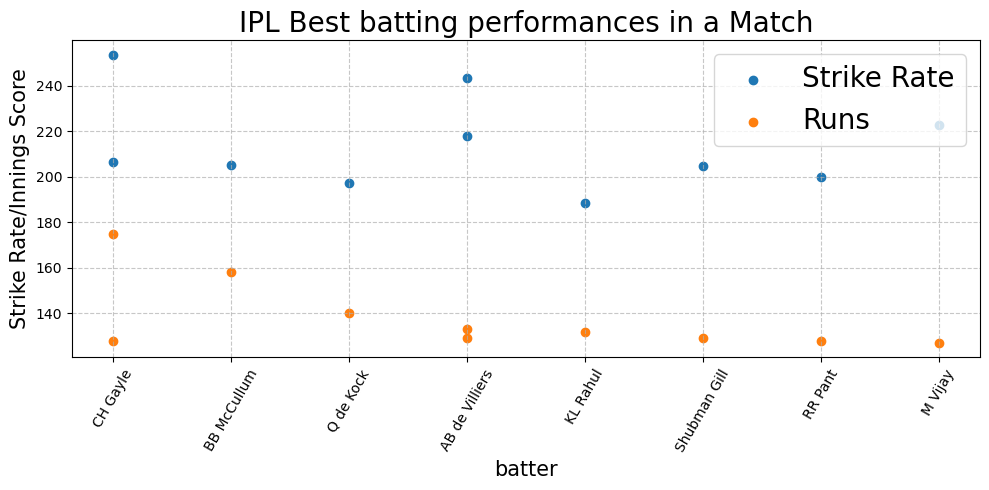

In [108]:
batting_ings=file.groupby(['match_id','batter']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_ings_sorted[:10] 
batsman_ball_faced=file.groupby(['match_id','batter']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['match_id','batter'],right_on=['match_id','batter'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,file,how='inner',left_on=['match_id','batter'],right_on=['match_id','batter'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',batsmen_innings_req_2)
x=batsmen_innings_req_2['batter']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.xlabel('batter',size=15)
plt.ylabel('Strike Rate/Innings Score',size=15)
plt.title('IPL Best batting performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Strike Rate','Runs'],prop={'size':20})
plt.grid(True, linestyle='--', alpha=0.7)  
plt.tight_layout()

In [ ]:
# Top 10 Bowlers in IPL- Seasons 2008-2019

In [25]:
#Run Out is not considered as a wicket in the Bowler's account- hence we shall be removing them first
bowling_wickets=file[file['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Top 10 Bowlers in IPL- Seasons 2008-2019')
fig.show()

The Top Wicket Takers in the Tournament are:
          bowler  Wickets
445   YS Chahal      205
297   PP Chawla      192
102    DJ Bravo      183
61      B Kumar      181
304    R Ashwin      181
379   SP Narine      180
7      A Mishra      174
372  SL Malinga      170
168   JJ Bumrah      168
319   RA Jadeja      160


In [ ]:
# IPL Best bowling performances in a Match

The Top 10 Batting Performances in the IPL History are:
             bowler  Wickets  Runs Conceeded  Runs per Wicket  inning  \
0        AS Joseph        6              14         2.333333       2   
24         A Zampa        6              19         3.166667       1   
48   Sohail Tanvir        6              15         2.500000       1   
72    PWH de Silva        5              19         3.800000       2   
96   Akash Madhwal        5               6         1.200000       2   
117       MM Patel        5              25         5.000000       1   
141      YS Chahal        5              40         8.000000       2   
169      SP Narine        5              20         4.000000       1   
194    Yash Thakur        5              31         6.200000       2   
219        B Kumar        5              31         6.200000       1   

              batting_team                 bowling_team  
0      Sunrisers Hyderabad               Mumbai Indians  
24     Sunrisers Hyderabad      Ri

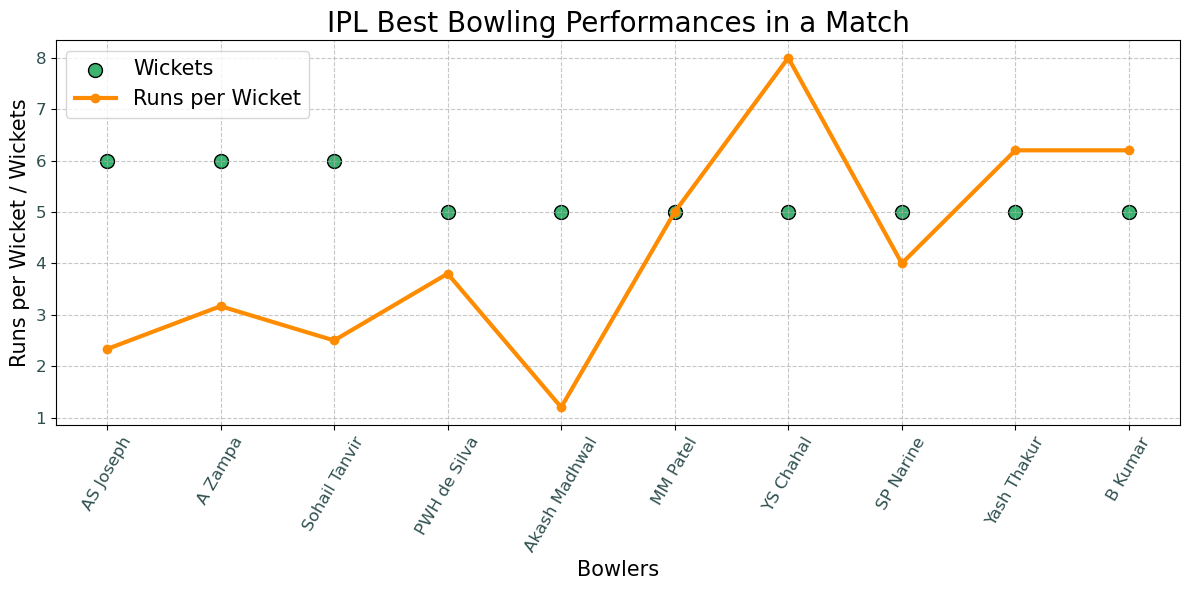

In [107]:
bowling_wickets_filtered = file[file['dismissal_kind'] != 'run out']
bowling_wickets_grouped = bowling_wickets_filtered.groupby(['match_id', 'bowler'])['dismissal_kind'].apply(lambda x: x.dropna().count()).reset_index(name='Wickets')
sorted_bowling_wickets = bowling_wickets_grouped.sort_values(by='Wickets', ascending=False)
top_bowlers_match_wickets = sorted_bowling_wickets.head(10)[['match_id', 'bowler', 'Wickets']]

bowling_runs = file.groupby(['match_id', 'bowler'])['total_runs'].sum().reset_index(name='Runs Conceeded')
bowler_performance = pd.merge(top_bowlers_match_wickets, bowling_runs, on=['match_id', 'bowler'], how='inner')
bowler_performance['Runs per Wicket'] = bowler_performance['Runs Conceeded'] / bowler_performance['Wickets']

merged_bowler_data = pd.merge(bowler_performance, file, on=['match_id', 'bowler'], how='inner')
bowler_stats = merged_bowler_data.iloc[:, 1:8].drop_duplicates()

print('The Top 10 Batting Performances in the IPL History are:\n', bowler_stats)

bowlers = bowler_stats['bowler']
wickets = bowler_stats['Wickets']
runs_per_wicket = bowler_stats['Runs per Wicket']

plt.figure(figsize=(12, 6))
plt.scatter(bowlers, wickets, label='Wickets', color='mediumseagreen', s=100, edgecolor='black')  # Green color with black edges
plt.plot(bowlers, runs_per_wicket, 'o-', color='darkorange', label='Runs per Wicket', linewidth=3)  # Orange line with markers
plt.xlabel('Bowlers', size=15)
plt.ylabel('Runs per Wicket / Wickets', size=15)
plt.title('IPL Best Bowling Performances in a Match', size=20)
plt.xticks(rotation=60, fontsize=12, color='darkslategray')
plt.yticks(fontsize=12, color='darkslategray')
plt.legend(prop={'size': 15}, loc='upper left')

plt.grid(True, linestyle='--', alpha=0.7)  
plt.tight_layout()

plt.show()


In [ ]:
Top 10 Fielders in IPL- Seasons 2008-2019

In [76]:
#Creating a list of the best fielders- Considering Catch,Run Out and Stumpings
fielder_list = file.groupby('fielder', group_keys=False).apply(lambda x: x).dropna().reset_index()
fielder_list_count=fielder_list.groupby('fielder').count()
fielder_list_counts=fielder_list_count['dismissal_kind'].reset_index(name='Dismissals')
fielder_list_max=fielder_list_counts.sort_values(by='Dismissals',ascending=False)
top_fielders=fielder_list_max[0:10]
print('The Best Fielders(and WicketKeepers) in the Torunament are:\n',top_fielders)

fig = px.bar(top_fielders, x='fielder', y='Dismissals',
             hover_data=['fielder'], color='Dismissals',title='Top 10 Fielders in IPL- Seasons 2008-2019')
fig.show()

The Best Fielders(and WicketKeepers) in the Torunament are:
          fielder  Dismissals
25     SV Samson           7
17      MS Dhoni           7
14    KD Karthik           6
27       WP Saha           4
9   Ishan Kishan           3
20      PA Patel           3
21       RR Pant           2
0   AC Gilchrist           2
28   YV Takawale           2
19       NV Ojha           1


In [ ]:
# Overall Runs vs Strike Rate Analysis

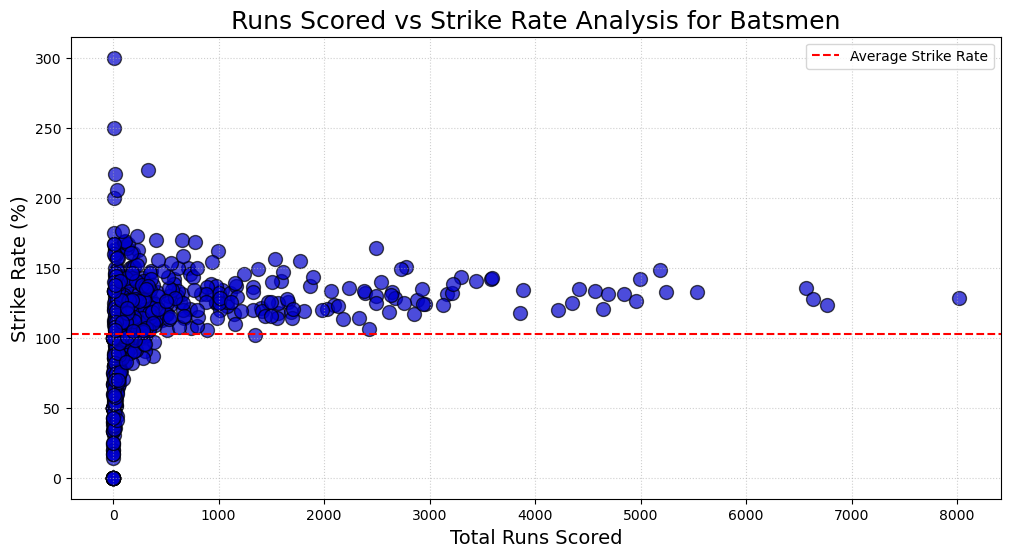

The Top 10 Batsmen with highest Strike Rates scoring at least 1000 Runs:
               batter  Total Runs  Strike Rate
39        AD Russell        2488   164.224422
561        SP Narine        1534   155.894309
396         N Pooran        1769   154.768154
203       GJ Maxwell        2772   150.488599
70   Abhishek Sharma        1377   148.864865
633         V Sehwag        2728   148.827059
30    AB de Villiers        5181   148.580442
662      YBK Jaiswal        1607   146.757991
557       SO Hetmyer        1243   145.550351
490          RR Pant        3297   143.597561


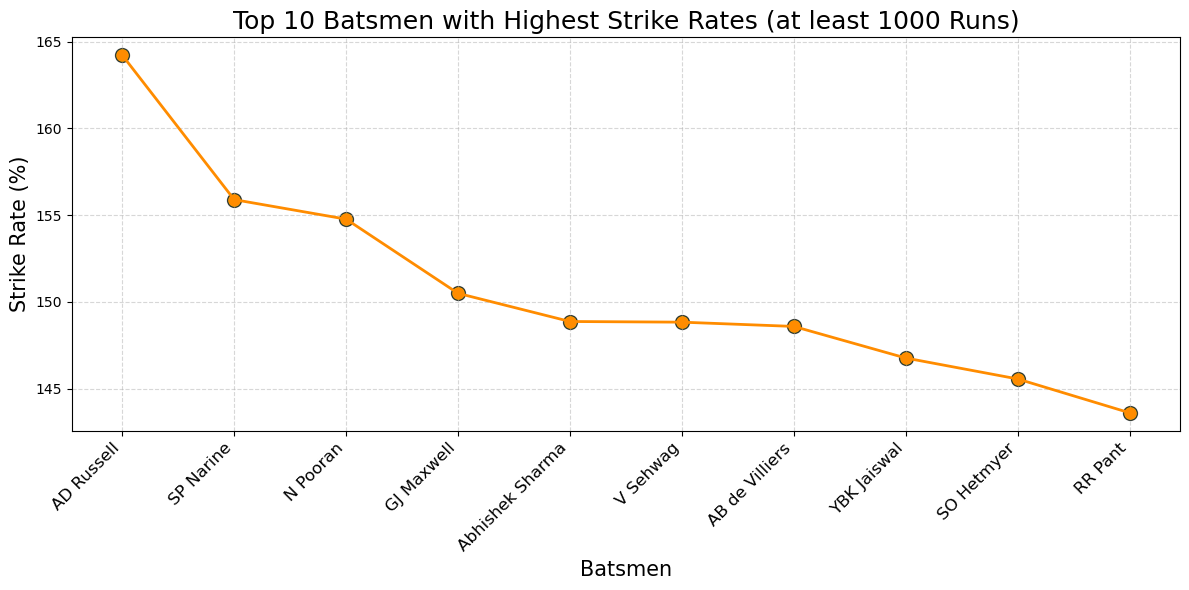

In [109]:
Target_run = 1000

batting_total_runs = file.groupby('batter').apply(lambda x: np.sum(x['batsman_runs'])).reset_index(name='Total Runs')
batsman_balls_played = file.groupby('batter').count()
batsman_balls_faced = batsman_balls_played['ball'].reset_index(name='Balls Faced')

batsman_stats = pd.merge(batting_total_runs, batsman_balls_faced, left_on='batter', right_on='batter', how='outer')
batsman_stats['Strike Rate'] = (batsman_stats['Total Runs'] / batsman_stats['Balls Faced']) * 100

plt.figure(figsize=(12, 6))
plt.scatter(batsman_stats['Total Runs'], batsman_stats['Strike Rate'], color='mediumblue', alpha=0.7, edgecolor='black', s=100)
plt.axhline(y=np.mean(batsman_stats['Strike Rate']), color='red', linestyle='--', label='Average Strike Rate')
plt.xlabel('Total Runs Scored', fontsize=14)
plt.ylabel('Strike Rate (%)', fontsize=14)
plt.title('Runs Scored vs Strike Rate Analysis for Batsmen', fontsize=18)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

sorted_strike_rate = batsman_stats.sort_values(by='Strike Rate', ascending=False)
high_strike_rate_batsmen = sorted_strike_rate[sorted_strike_rate['Total Runs'] >= Target_run]

top_strike_rate_batsmen = high_strike_rate_batsmen.loc[:, ['batter', 'Total Runs', 'Strike Rate']].head(10)

print(f'The Top 10 Batsmen with highest Strike Rates scoring at least {Target_run} Runs:\n', top_strike_rate_batsmen)

plt.figure(figsize=(12, 6))
plt.plot(top_strike_rate_batsmen['batter'], top_strike_rate_batsmen['Strike Rate'], marker='o', linestyle='-', color='darkorange', linewidth=2, markersize=8)
plt.scatter(top_strike_rate_batsmen['batter'], top_strike_rate_batsmen['Strike Rate'], color='darkgreen', s=100, edgecolor='black', alpha=0.7)
plt.xlabel('Batsmen', fontsize=15)
plt.ylabel('Strike Rate (%)', fontsize=15)
plt.title('Top 10 Batsmen with Highest Strike Rates (at least 1000 Runs)', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Balls vs Econom Rate Analysis

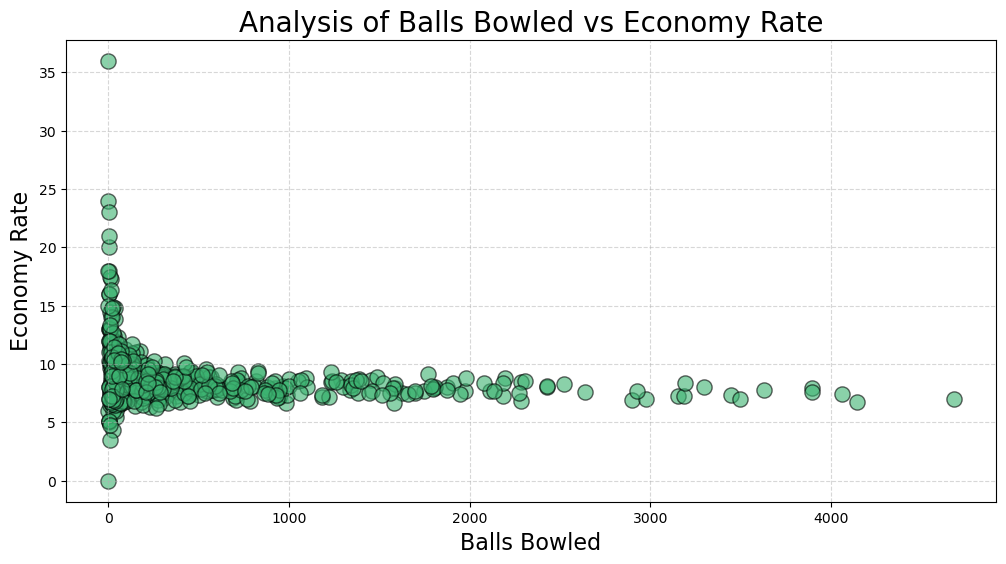

Top 10 Bowlers with the Best Economy Rates, bowling at least 1000 Balls:
               bowler  Balls Bowled  Economy Rate
263   M Muralitharan          1581      6.698292
446        SP Narine          4146      6.761216
138         DW Steyn          2282      6.791411
398      Rashid Khan          2901      6.907963
355         R Ashwin          4679      6.969438
438       SL Malinga          2974      7.032952
163  Harbhajan Singh          3496      7.038330
437         SK Warne          1223      7.187244
259         M Kartik          1182      7.197970
193        JJ Bumrah          3185      7.233909


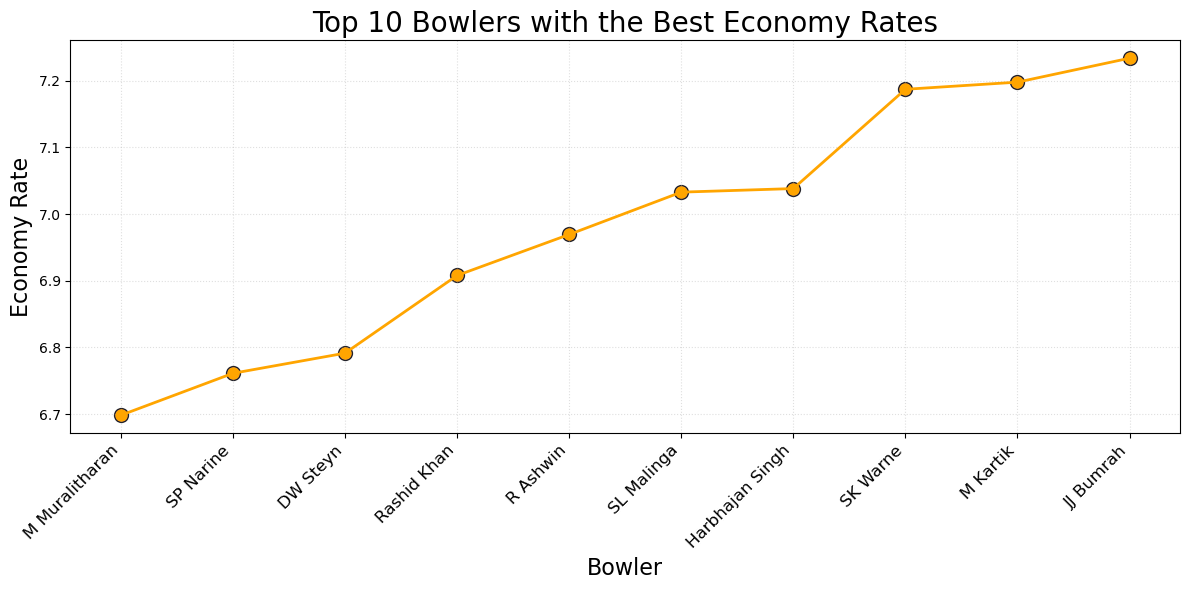

In [110]:
Ball_Limit = 1000

bowler_runs_conceeded = file.groupby('bowler').apply(lambda x: np.sum(x['total_runs'])).reset_index(name='Total Runs Conceeded')
bowler_balls_bowled = file.groupby('bowler').count()
bowler_balls_count = bowler_balls_bowled['ball'].reset_index(name='Balls Bowled')

bowler_performance = pd.merge(bowler_runs_conceeded, bowler_balls_count, left_on='bowler', right_on='bowler', how='outer')
bowler_performance['Economy Rate'] = (bowler_performance['Total Runs Conceeded'] / bowler_performance['Balls Bowled']) * 6

plt.figure(figsize=(12, 6))
plt.scatter(bowler_performance['Balls Bowled'], bowler_performance['Economy Rate'], color='mediumseagreen', edgecolor='black', alpha=0.6, s=120)
plt.xlabel('Balls Bowled', fontsize=16)
plt.ylabel('Economy Rate', fontsize=16)
plt.title('Analysis of Balls Bowled vs Economy Rate', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

best_economy_rate = bowler_performance.sort_values(by='Economy Rate', ascending=True)
best_economy_rate_condition = best_economy_rate[best_economy_rate['Balls Bowled'] >= Ball_Limit]

top_bowlers_economy = best_economy_rate_condition.loc[:, ['bowler', 'Balls Bowled', 'Economy Rate']].head(10)

print(f'Top 10 Bowlers with the Best Economy Rates, bowling at least {Ball_Limit} Balls:\n', top_bowlers_economy)

plt.figure(figsize=(12, 6))
plt.plot(top_bowlers_economy['bowler'], top_bowlers_economy['Economy Rate'], marker='o', linestyle='-', color='orange', linewidth=2, markersize=8)
plt.scatter(top_bowlers_economy['bowler'], top_bowlers_economy['Economy Rate'], color='darkblue', s=100, edgecolor='black', alpha=0.8)
plt.xlabel('Bowler', fontsize=16)
plt.ylabel('Economy Rate', fontsize=16)
plt.title('Top 10 Bowlers with the Best Economy Rates', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
# Top 15 Players who have won most the Man of the Match trophies

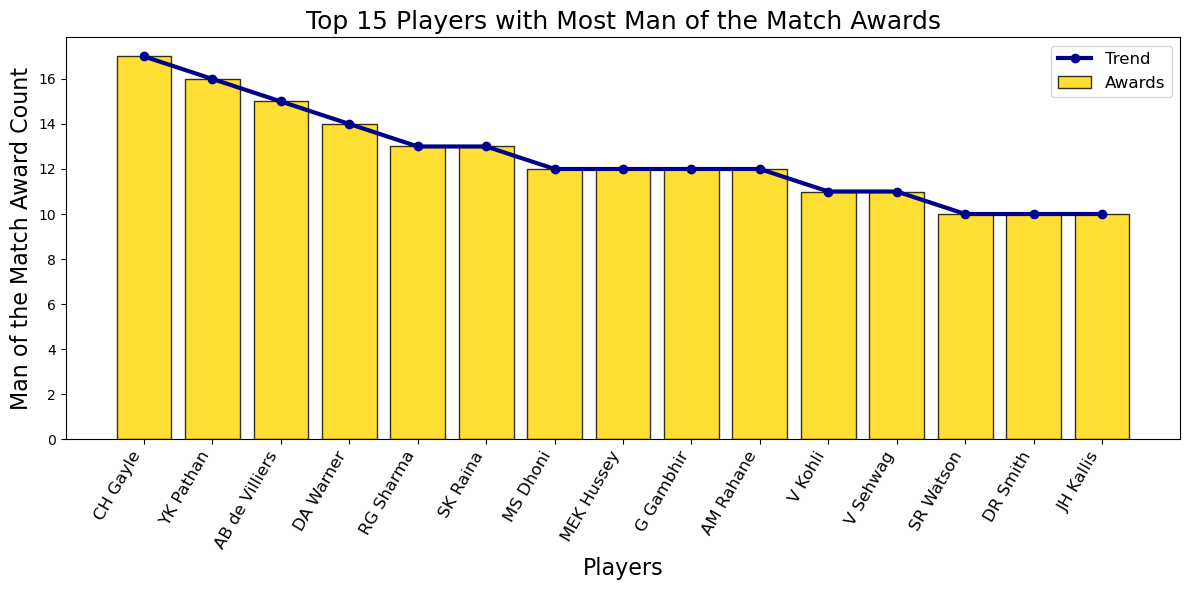

In [111]:
motm_awards = file2.groupby('player_of_match').apply(lambda x: x['player_of_match'].count()).reset_index(name='Man of the Match Awards')
sorted_motm = motm_awards.sort_values(by='Man of the Match Awards', ascending=False)
top_15_motm = sorted_motm.head(15)

plt.figure(figsize=(12, 6))
plt.bar(top_15_motm['player_of_match'], top_15_motm['Man of the Match Awards'], color='gold', edgecolor='black', alpha=0.8, label='Awards')
plt.plot(top_15_motm['player_of_match'], top_15_motm['Man of the Match Awards'], marker='o', linestyle='-', color='darkblue', linewidth=3, label='Trend')
plt.xlabel('Players', fontsize=16)
plt.ylabel('Man of the Match Award Count', fontsize=16)
plt.title('Top 15 Players with Most Man of the Match Awards', fontsize=18)
plt.xticks(rotation=60, ha='right', fontsize=12)
plt.legend(prop={'size': 12})
plt.tight_layout()
plt.show()


In [ ]:
# Overall Performance by Top 10 Performers in IPL-2008-2019

Top 10 All-Round Performers in IPL (2008-2019):
          batter  Runs  Wickets  Dismissals  Total Score
3    KA Pollard  3437       69         1.0       2763.5
4   Rashid Khan   545      149         1.0       2517.5
2     HH Pandya  2534       64         1.0       2237.0
1      DW Steyn   167       97         1.0       1548.5
0  AC Gilchrist  2069        1         2.0       1069.5
5    TG Southee   120       47         1.0        775.0


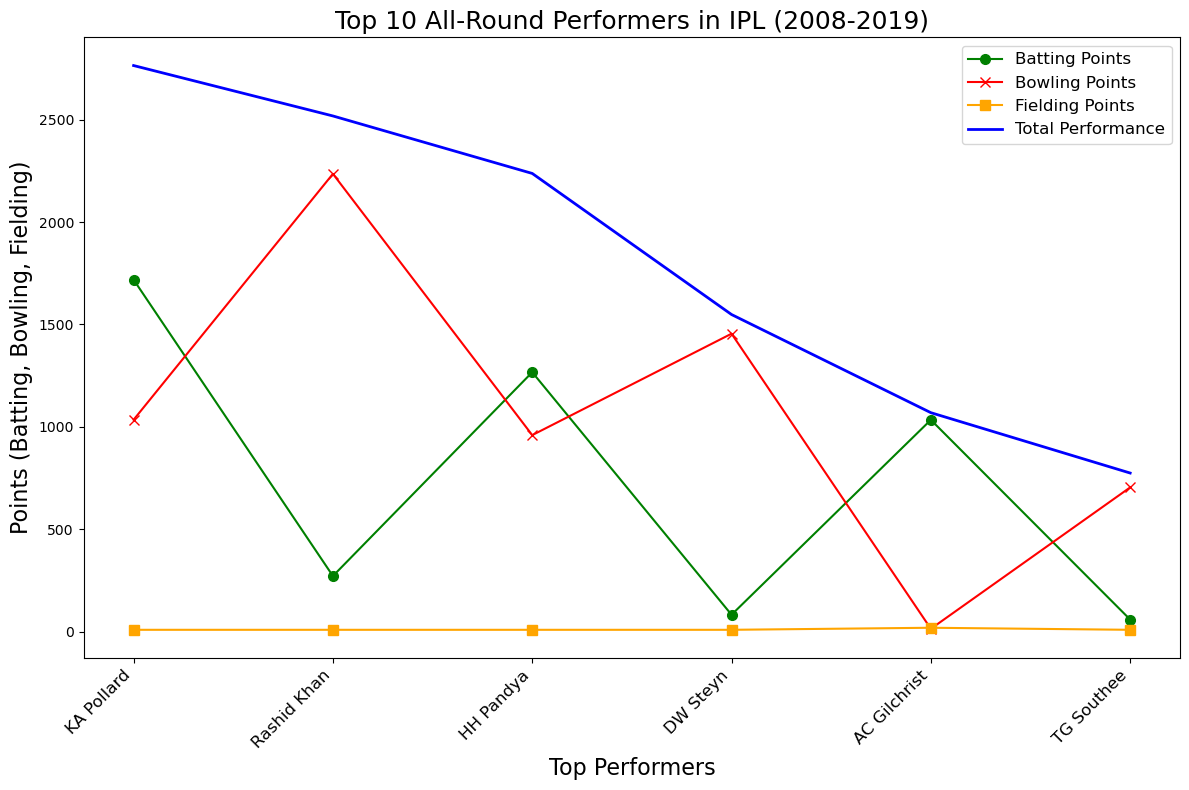

In [112]:
batting_weight = 0.5
bowling_weight = 15.0
fielding_weight = 10.0

merged_batting_bowling = pd.merge(batting_sorted, bowling_top, left_on='batter', right_on='bowler', how='inner')
merged_all_rounders = pd.merge(merged_batting_bowling, fielder_list_max, left_on='batter', right_on='fielder', how='left')

overall_performance = merged_all_rounders.groupby(['batter', 'Runs', 'Wickets', 'Dismissals']).apply(
    lambda x: ((x['Runs'] * batting_weight) + (x['Wickets'] * bowling_weight) + (x['Dismissals'] * fielding_weight))
).reset_index(name='Total Score')

top_performers = overall_performance.sort_values(by='Total Score', ascending=False)

top_10_performers = top_performers.loc[:, ['batter', 'Runs', 'Wickets', 'Dismissals', 'Total Score']].head(10)

print('Top 10 All-Round Performers in IPL (2008-2019):\n', top_10_performers)

plt.figure(figsize=(12, 8))

plt.plot(top_10_performers['batter'], top_10_performers['Runs'] * batting_weight, color='green', marker='o', markersize=7)
plt.plot(top_10_performers['batter'], top_10_performers['Wickets'] * bowling_weight, color='red', marker='x', markersize=7)
plt.plot(top_10_performers['batter'], top_10_performers['Dismissals'] * fielding_weight, color='orange', marker='s', markersize=7)
plt.plot(top_10_performers['batter'], top_10_performers['Total Score'], color='blue', linewidth=2)

plt.xlabel('Top Performers', fontsize=16)
plt.ylabel('Points (Batting, Bowling, Fielding)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Top 10 All-Round Performers in IPL (2008-2019)', fontsize=18)

plt.legend(['Batting Points', 'Bowling Points', 'Fielding Points', 'Total Performance'], fontsize=12)
plt.tight_layout()

plt.show()


In [ ]:
# Innings Total across all Seasons- 2008-2019

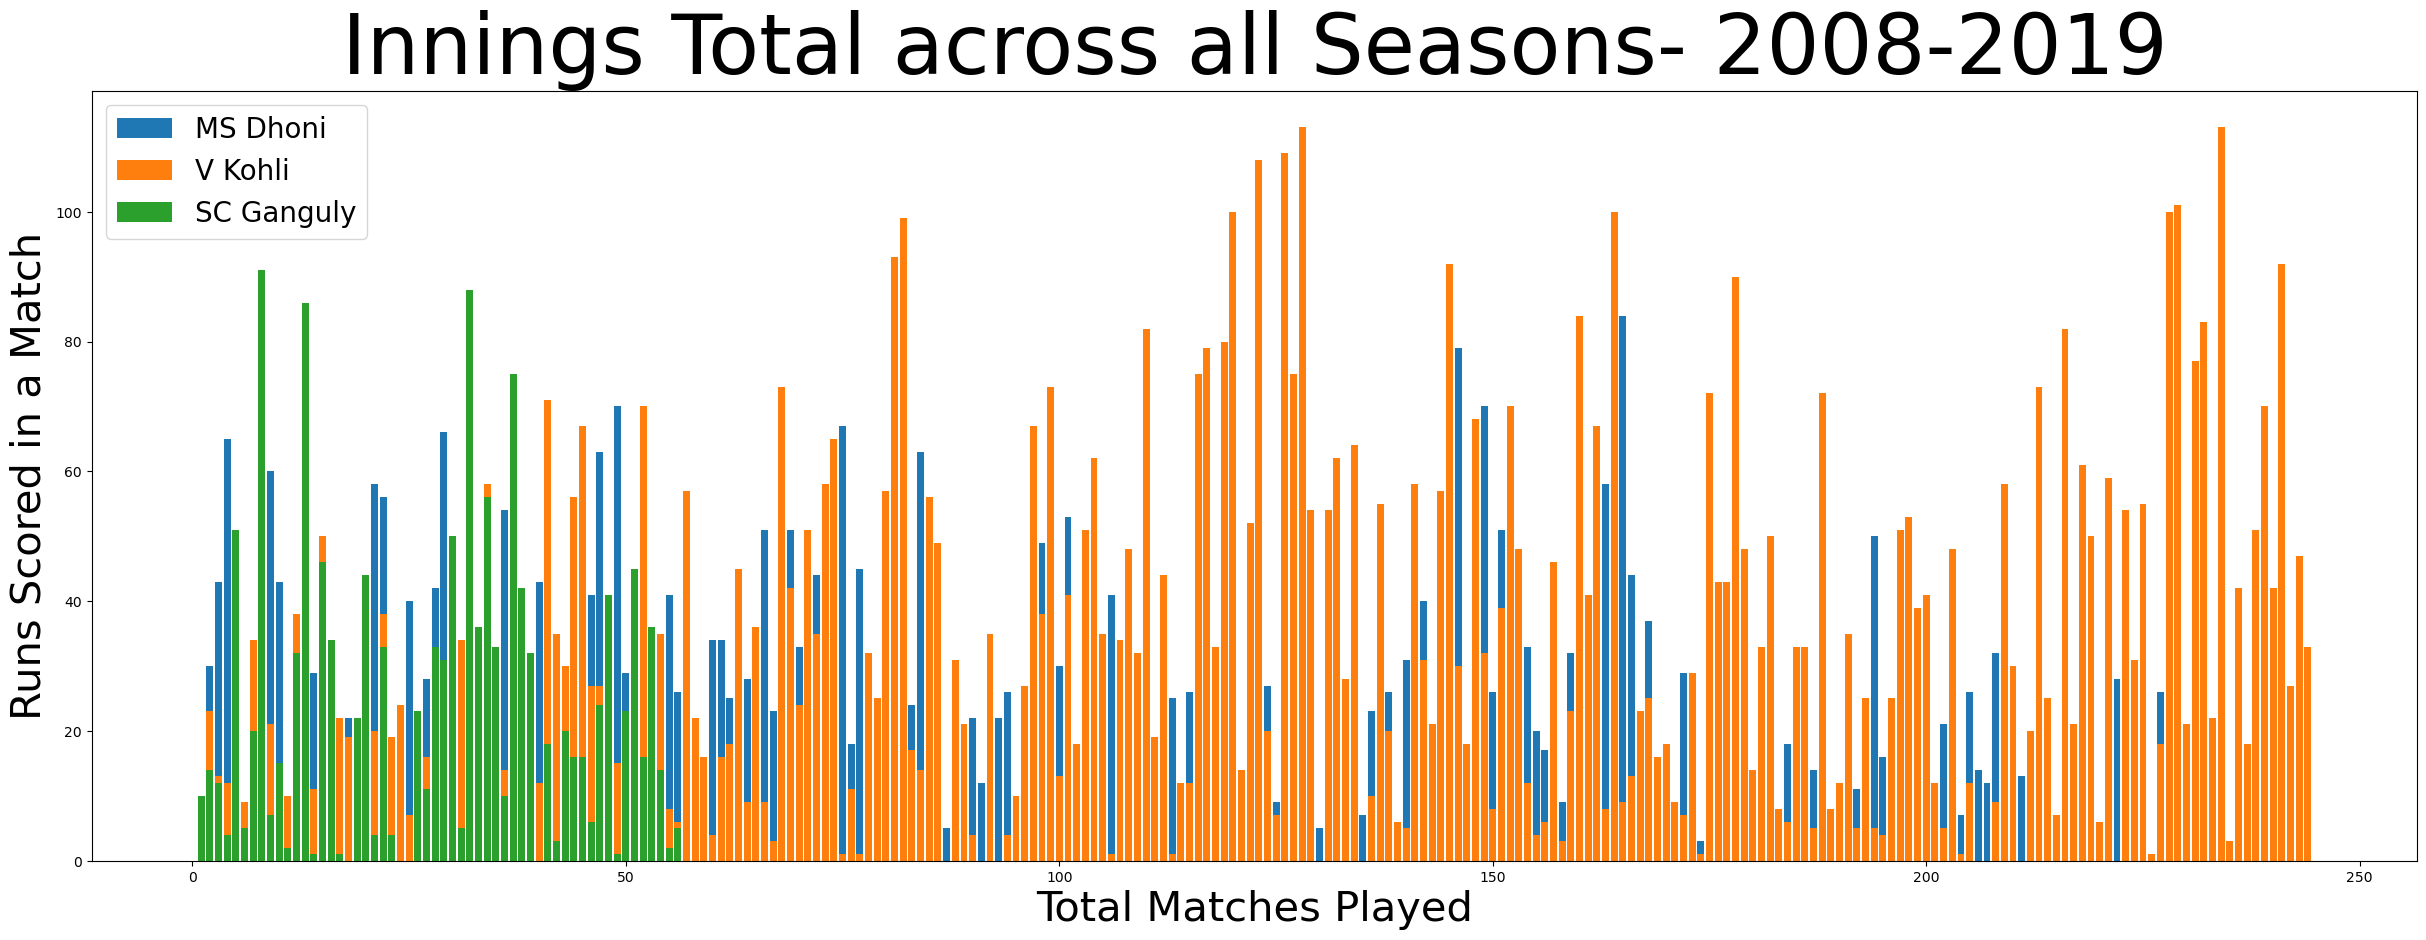

In [117]:
batsman_list_req = ['MS Dhoni', 'V Kohli', 'SC Ganguly']
batsman = file[file['batter'].isin(batsman_list_req)]
batsman_run = batsman.groupby(['match_id', 'batter']).apply(lambda x: np.sum(x['batsman_runs'])).reset_index(name='Runs')

plt.figure(figsize=(30, 10))
colors = ['#e63946', '#457b9d', '#2a9d8f']
for name in batsman_list_req:
    batsman_check = batsman_run[batsman_run['batter'] == name]
    batsman_check.index = np.arange(1, len(batsman_check) + 1)
    x = batsman_check.index
    y = batsman_check['Runs']
    plt.bar(x, y)
plt.legend(batsman_list_req, prop={'size': 20})
plt.title("Innings Total across all Seasons- 2008-2019", fontsize=60)
plt.xlabel("Total Matches Played", fontsize=30)
plt.ylabel("Runs Scored in a Match", fontsize=30)
plt.show()


In [ ]:
# Player innings wise score against a team across- 2008-2019

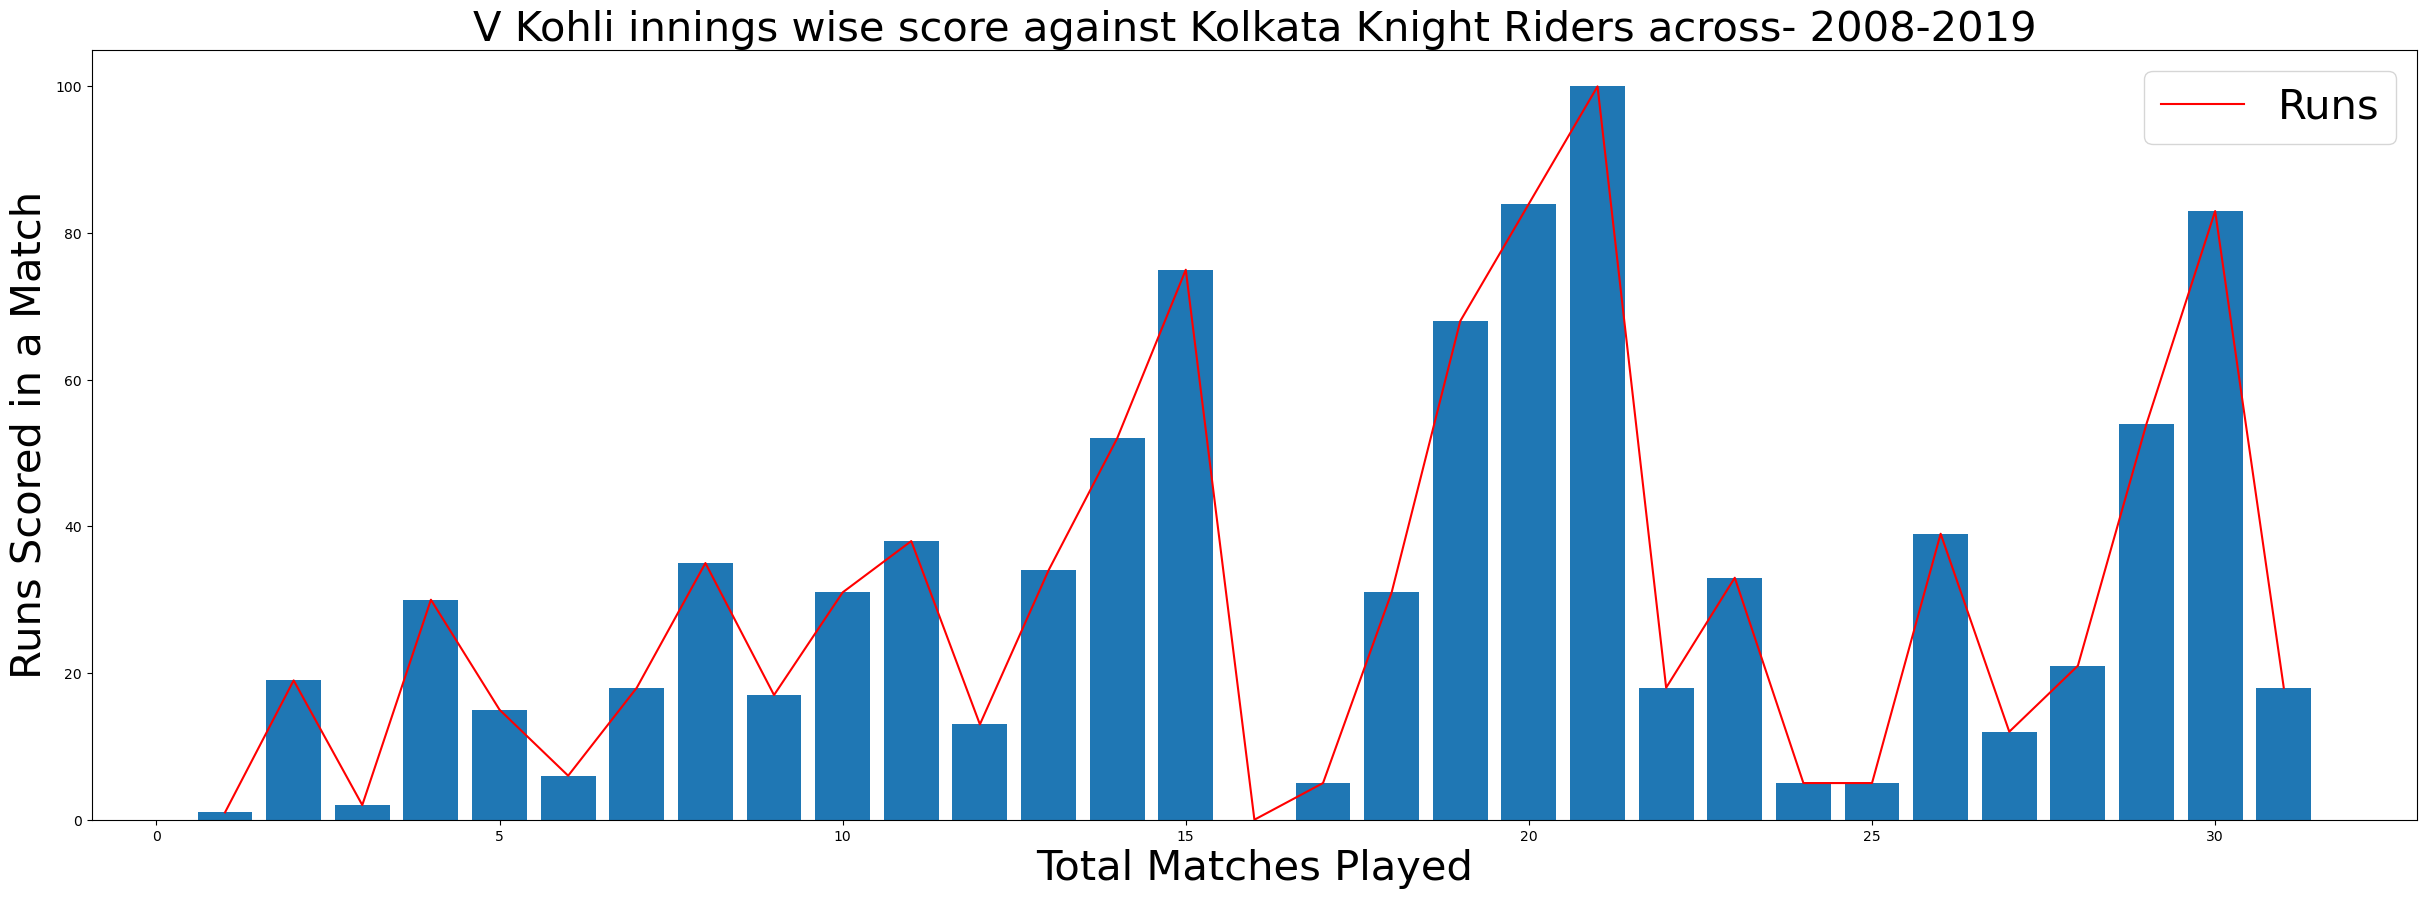

The runs scored in matches: 
 1       1
2      19
3       2
4      30
5      15
6       6
7      18
8      35
9      17
10     31
11     38
12     13
13     34
14     52
15     75
16      0
17      5
18     31
19     68
20     84
21    100
22     18
23     33
24      5
25      5
26     39
27     12
28     21
29     54
30     83
31     18
Name: Runs, dtype: int64
---------------------------------------------------------------------------------------------
The Economy rate of the various bowlers of Kolkata Knight Riders against the V Kohli (best to worst)
                bowler  Balls Bowled  Economy Rate
6           JH Kallis            35      5.142857
5       Iqbal Abdulla            13      5.538462
2            CV Varun            39      6.153846
8            L Balaji            18      6.333333
1               B Lee            16      6.375000
14          SP Narine           118      6.508475
7       Kuldeep Yadav            35      6.514286
15    Shakib Al Hasan            32    

In [83]:
batsman_list_req = ['V Kohli']
opposition_team = 'Kolkata Knight Riders'
ball_limit = 12

# Updated to match correct column names
cond_1_1 = file['batter'].isin(batsman_list_req)
cond_1_2 = file['bowling_team'] == opposition_team

batsman_team = file[(cond_1_1) & (cond_1_2)]
batsman_team_run = batsman_team.groupby(['match_id', 'batter', 'bowling_team']).apply(lambda x: np.sum(x['batsman_runs'])).reset_index(name='Runs')

bowling_runs = batsman_team.groupby('bowler').apply(lambda x: np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls = batsman_team.groupby('bowler').count()
bowled_balls = bowling_balls['ball'].reset_index(name='Balls Bowled')

bowled_balls_limit = bowled_balls[bowled_balls['Balls Bowled'] >= ball_limit]
bowler_stats = pd.merge(bowling_runs, bowled_balls_limit, left_on='bowler', right_on='bowler', how='inner')

bowler_economy_rate = bowler_stats.groupby(['bowler', 'Balls Bowled']).apply(
    lambda x: ((x['Runs Conceeded'] / x['Balls Bowled']) * 6)
).reset_index(name='Economy Rate')

bowler_best_to_worst_1 = bowler_economy_rate.sort_values(by='Economy Rate', ascending=True)
bowler_best_to_worst = bowler_best_to_worst_1.loc[:, ['bowler', 'Balls Bowled', 'Economy Rate']]

# Plotting
plt.figure(figsize=(30, 10))
batsman_team_run.index = np.arange(1, len(batsman_team_run) + 1)
x = batsman_team_run.index
y = batsman_team_run['Runs']

plt.bar(x, y)
plt.plot(x, y, 'r')
plt.title("{} innings wise score against {} across- 2008-2019".format(batsman_list_req[0], opposition_team), fontsize=30)
plt.xlabel("Total Matches Played", fontsize=30)
plt.ylabel("Runs Scored in a Match", fontsize=30)
plt.legend(['Runs'], prop={'size': 30})
plt.show()

print('The runs scored in matches: \n', y)
print('---------------------------------------------------------------------------------------------')
print('The Economy rate of the various bowlers of {} against the {} (best to worst)\n'.format(opposition_team, batsman_list_req[0]), bowler_best_to_worst)


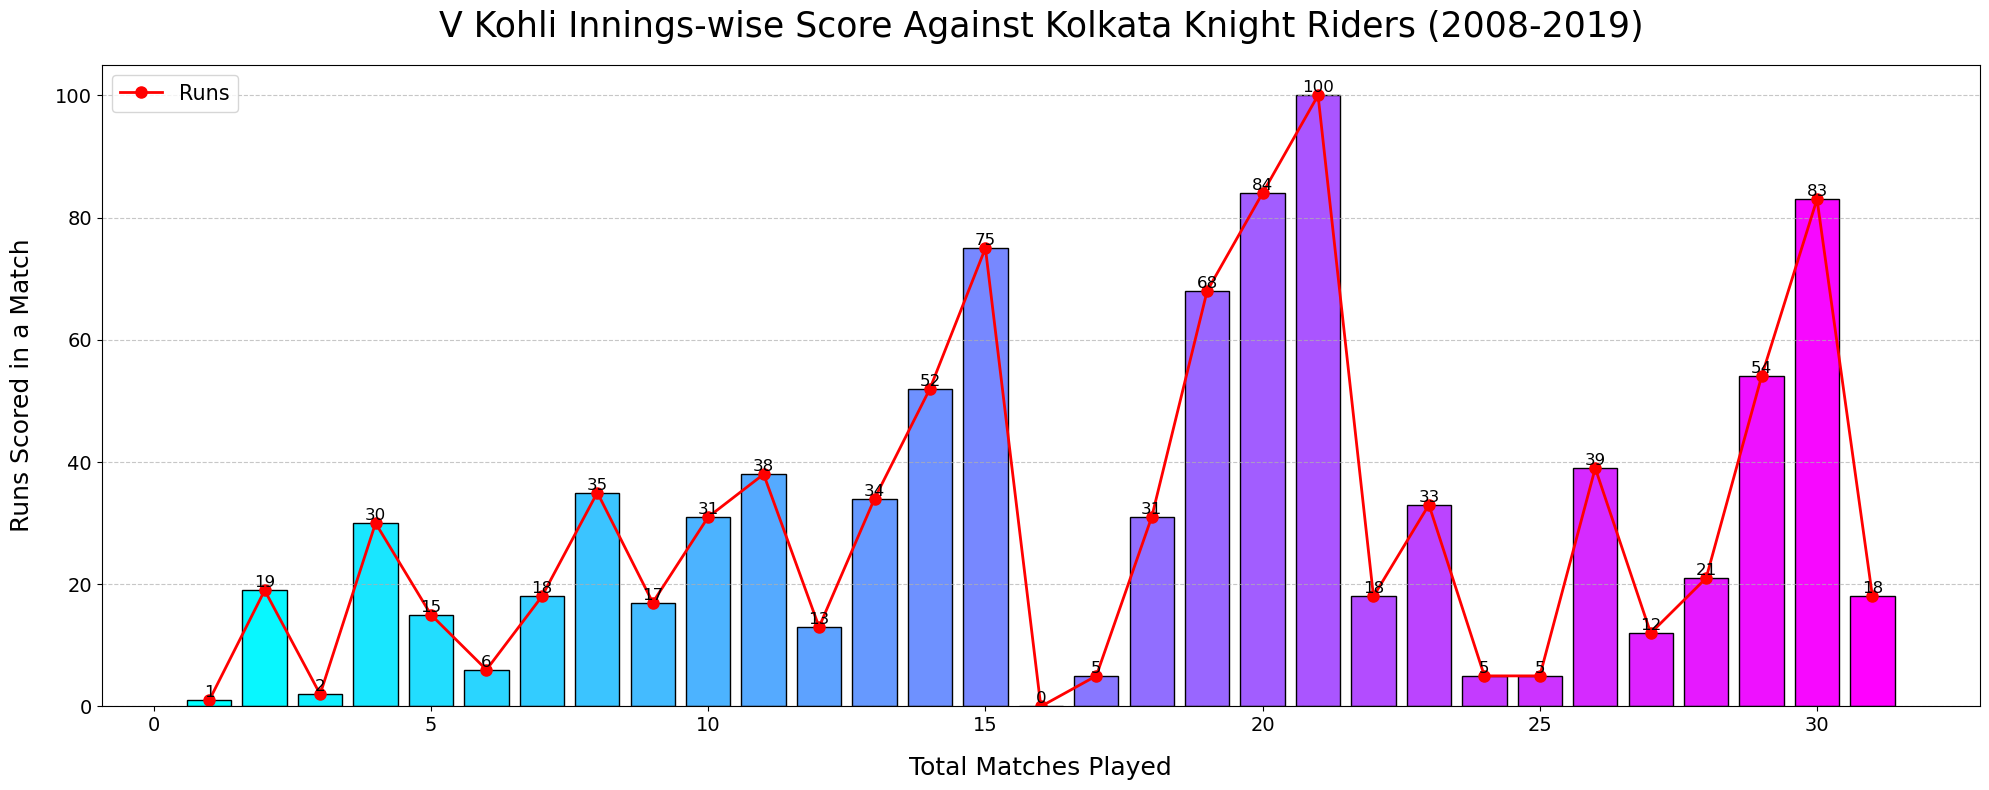

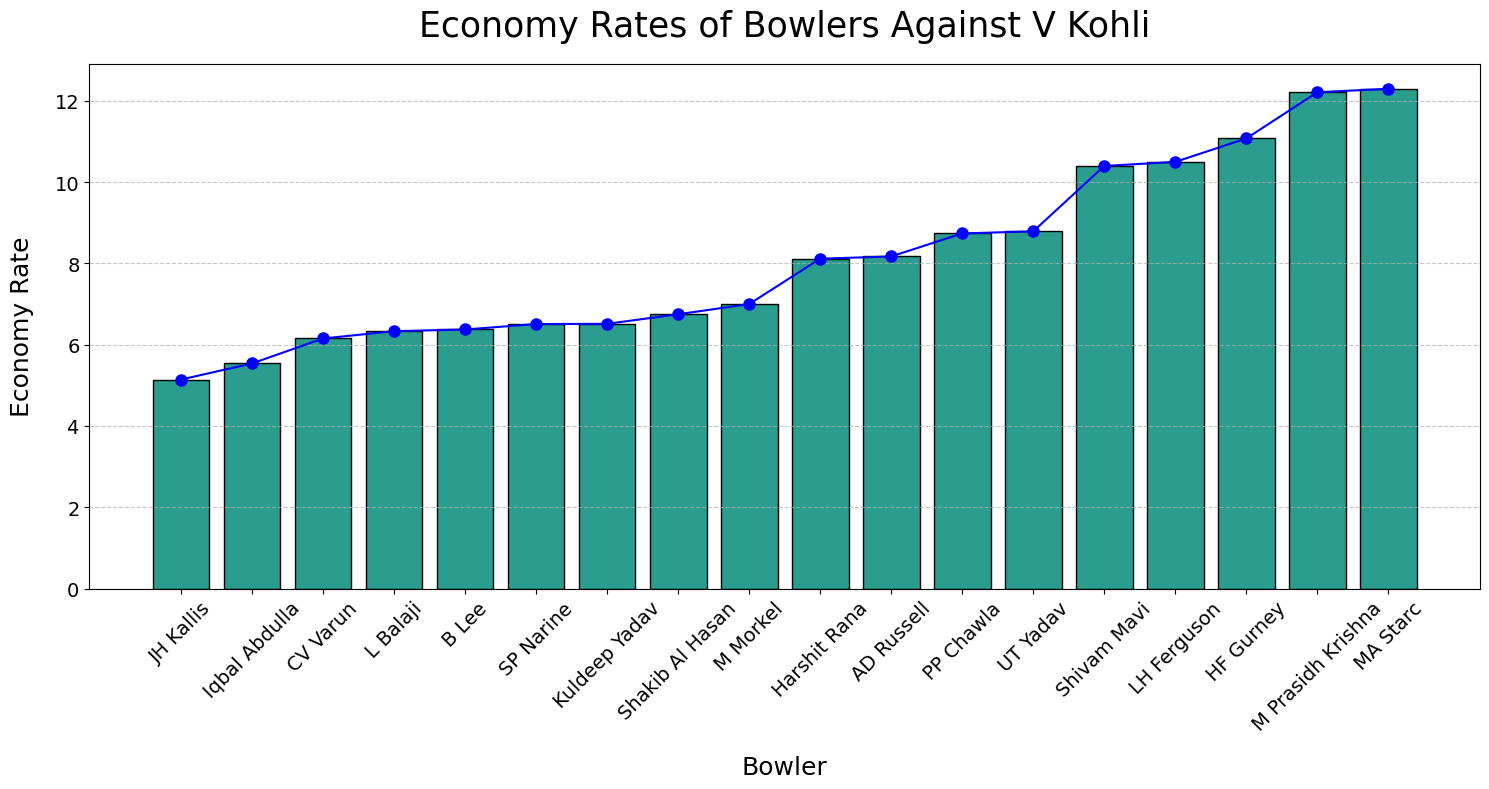

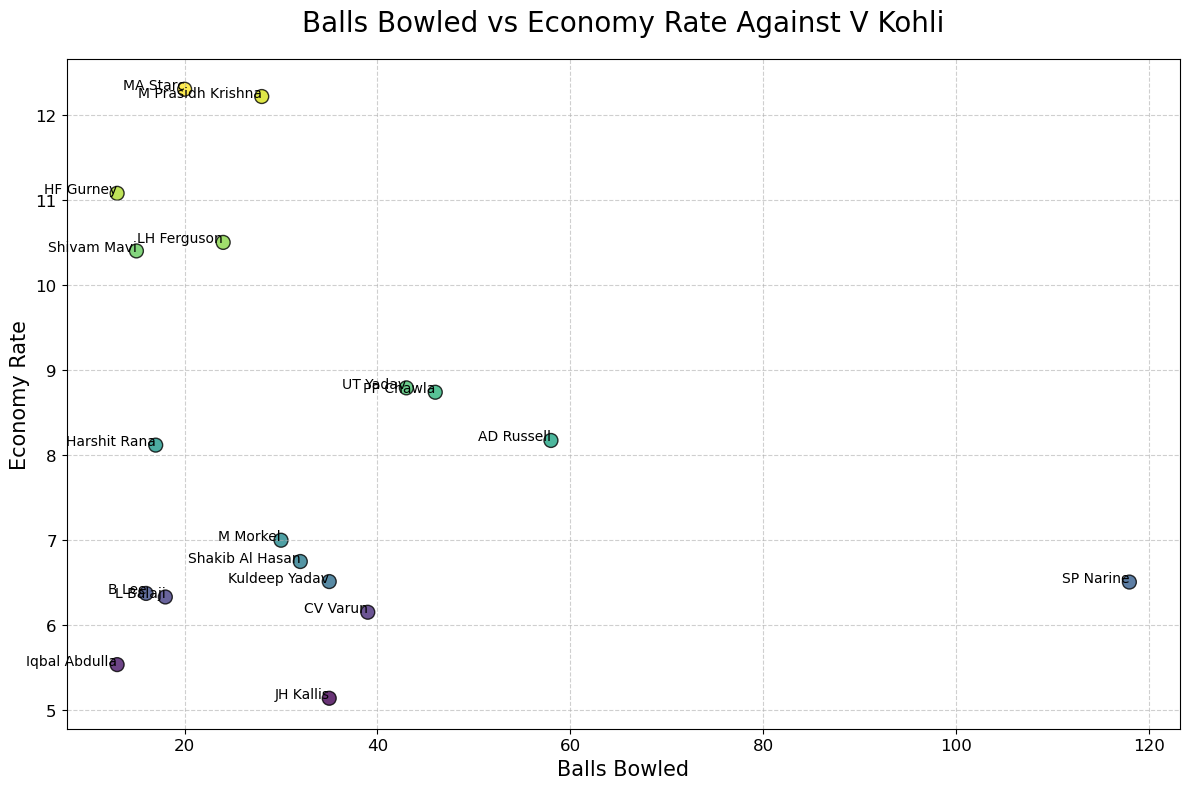

The runs scored in matches: 
 1       1
2      19
3       2
4      30
5      15
6       6
7      18
8      35
9      17
10     31
11     38
12     13
13     34
14     52
15     75
16      0
17      5
18     31
19     68
20     84
21    100
22     18
23     33
24      5
25      5
26     39
27     12
28     21
29     54
30     83
31     18
Name: Runs, dtype: int64
---------------------------------------------------------------------------------------------
The Economy rate of the various bowlers of Kolkata Knight Riders against the V Kohli (best to worst)
                bowler  Balls Bowled  Economy Rate
6           JH Kallis            35      5.142857
5       Iqbal Abdulla            13      5.538462
2            CV Varun            39      6.153846
8            L Balaji            18      6.333333
1               B Lee            16      6.375000
14          SP Narine           118      6.508475
7       Kuldeep Yadav            35      6.514286
15    Shakib Al Hasan            32    

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

batsman_list_req = ['V Kohli']
opposition_team = 'Kolkata Knight Riders'
ball_limit = 12

cond_1_1 = file['batter'].isin(batsman_list_req)
cond_1_2 = file['bowling_team'] == opposition_team

batsman_team = file[(cond_1_1) & (cond_1_2)]
batsman_team_run = batsman_team.groupby(['match_id', 'batter', 'bowling_team']).apply(lambda x: np.sum(x['batsman_runs'])).reset_index(name='Runs')

bowling_runs = batsman_team.groupby('bowler').apply(lambda x: np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls = batsman_team.groupby('bowler').count()
bowled_balls = bowling_balls['ball'].reset_index(name='Balls Bowled')

bowled_balls_limit = bowled_balls[bowled_balls['Balls Bowled'] >= ball_limit]
bowler_stats = pd.merge(bowling_runs, bowled_balls_limit, left_on='bowler', right_on='bowler', how='inner')

bowler_economy_rate = bowler_stats.groupby(['bowler', 'Balls Bowled']).apply(
    lambda x: ((x['Runs Conceeded'] / x['Balls Bowled']) * 6)
).reset_index(name='Economy Rate')

bowler_best_to_worst_1 = bowler_economy_rate.sort_values(by='Economy Rate', ascending=True)
bowler_best_to_worst = bowler_best_to_worst_1.loc[:, ['bowler', 'Balls Bowled', 'Economy Rate']]

plt.figure(figsize=(20, 8))
batsman_team_run.index = np.arange(1, len(batsman_team_run) + 1)
x = batsman_team_run.index
y = batsman_team_run['Runs']

bars = plt.bar(x, y, color=plt.cm.cool(np.linspace(0, 1, len(y))), edgecolor='black')
plt.plot(x, y, color='red', linewidth=2, marker='o', markersize=8)

plt.title("{} Innings-wise Score Against {} (2008-2019)".format(batsman_list_req[0], opposition_team), fontsize=25, pad=20)
plt.xlabel("Total Matches Played", fontsize=18, labelpad=15)
plt.ylabel("Runs Scored in a Match", fontsize=18, labelpad=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.legend(['Runs'], fontsize=15, loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
x_bowlers = bowler_best_to_worst['bowler']
y_economy = bowler_best_to_worst['Economy Rate']

plt.bar(x_bowlers, y_economy, color='#2a9d8f', edgecolor='black')
plt.plot(x_bowlers, y_economy, marker='o', color='blue', markersize=8)

plt.title("Economy Rates of Bowlers Against {}".format(batsman_list_req[0]), fontsize=25, pad=20)
plt.xlabel("Bowler", fontsize=18, labelpad=15)
plt.ylabel("Economy Rate", fontsize=18, labelpad=15)

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
x_scatter = bowler_best_to_worst['Balls Bowled']
y_scatter = bowler_best_to_worst['Economy Rate']
scatter_colors = plt.cm.viridis(np.linspace(0, 1, len(x_scatter)))

plt.scatter(x_scatter, y_scatter, s=100, c=scatter_colors, edgecolor='black', alpha=0.8)
for i, txt in enumerate(bowler_best_to_worst['bowler']):
    plt.annotate(txt, (x_scatter.iloc[i], y_scatter.iloc[i]), fontsize=10, ha='right')

plt.title("Balls Bowled vs Economy Rate Against {}".format(batsman_list_req[0]), fontsize=20, pad=20)
plt.xlabel("Balls Bowled", fontsize=15)
plt.ylabel("Economy Rate", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print('The runs scored in matches: \n', y)
print('---------------------------------------------------------------------------------------------')
print('The Economy rate of the various bowlers of {} against the {} (best to worst)\n'.format(opposition_team, batsman_list_req[0]), bowler_best_to_worst)


In [ ]:
# Team wise Batting Average in IPL- Seasons 2008-2019

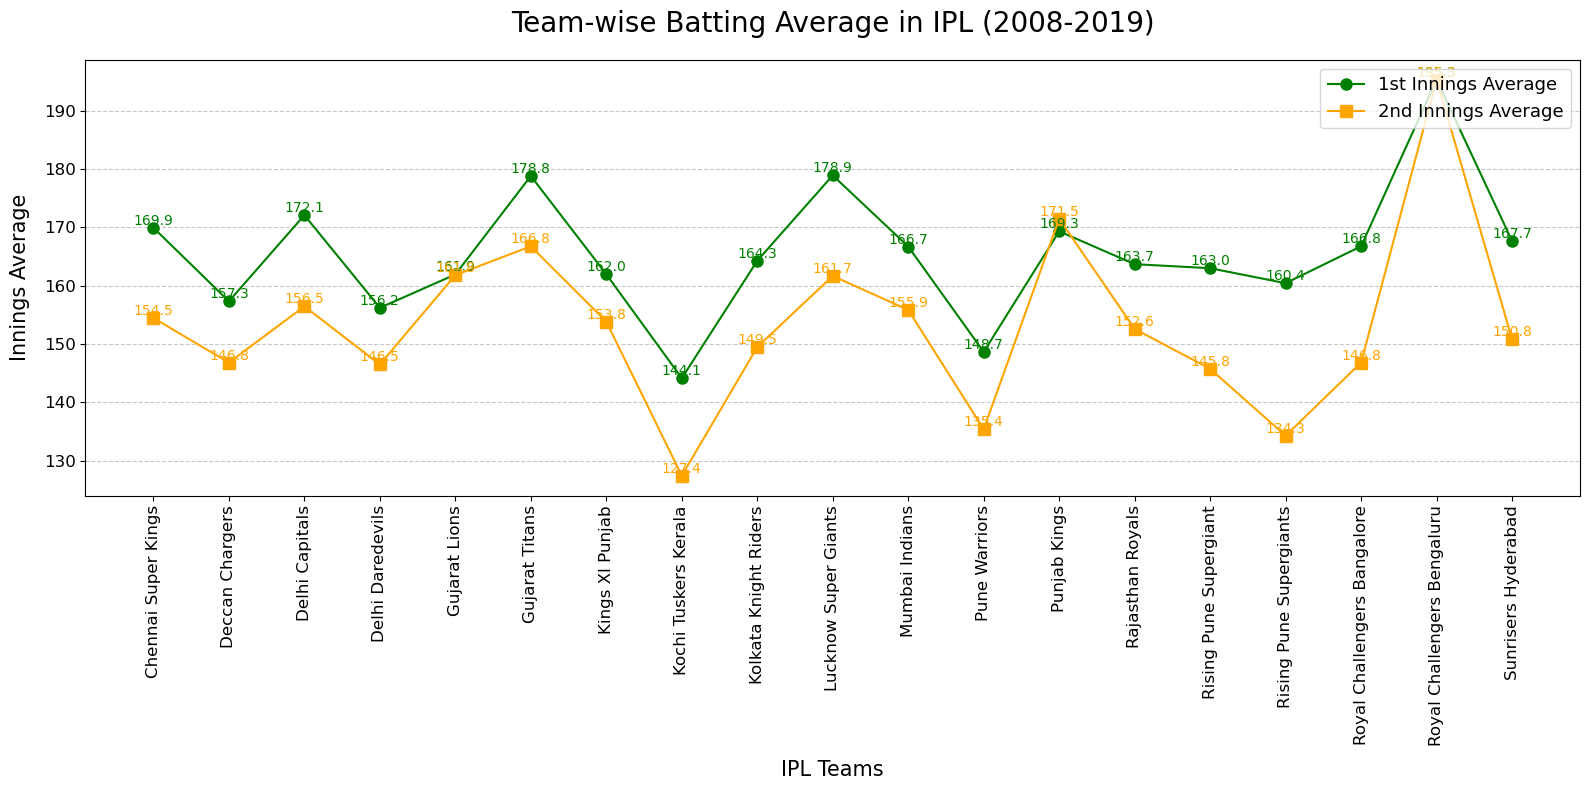

In [126]:
first_innings_run = file[file['inning'] == 1]
team_innings_run_1 = first_innings_run.groupby(['batting_team', 'match_id']).apply(lambda x: np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg_1 = team_innings_run_1.groupby('batting_team').apply(lambda x: np.mean(x['Innings Total'])).reset_index(name='Innings Average')

second_innings_run = file[file['inning'] == 2]
team_innings_run_2 = second_innings_run.groupby(['batting_team', 'match_id']).apply(lambda x: np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg_2 = team_innings_run_2.groupby('batting_team').apply(lambda x: np.mean(x['Innings Total'])).reset_index(name='Innings Average')

plt.figure(figsize=(16, 8))
plt.plot(team_innings_avg_1['batting_team'], team_innings_avg_1['Innings Average'], color='green', marker='o', markersize=8, label='1st Innings Average')
plt.plot(team_innings_avg_2['batting_team'], team_innings_avg_2['Innings Average'], color='orange', marker='s', markersize=8, label='2nd Innings Average')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('IPL Teams', fontsize=15, labelpad=10)
plt.ylabel('Innings Average', fontsize=15, labelpad=10)
plt.title('Team-wise Batting Average in IPL (2008-2019)', fontsize=20, pad=20)
plt.legend(fontsize=13, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, avg in enumerate(team_innings_avg_1['Innings Average']):
    plt.text(i, avg, f'{avg:.1f}', ha='center', va='bottom', fontsize=10, color='green')

for i, avg in enumerate(team_innings_avg_2['Innings Average']):
    plt.text(i, avg, f'{avg:.1f}', ha='center', va='bottom', fontsize=10, color='orange')

plt.tight_layout()
plt.show()


In [ ]:
# Team wise Bowling Average in IPL- Seasons 2008-2019

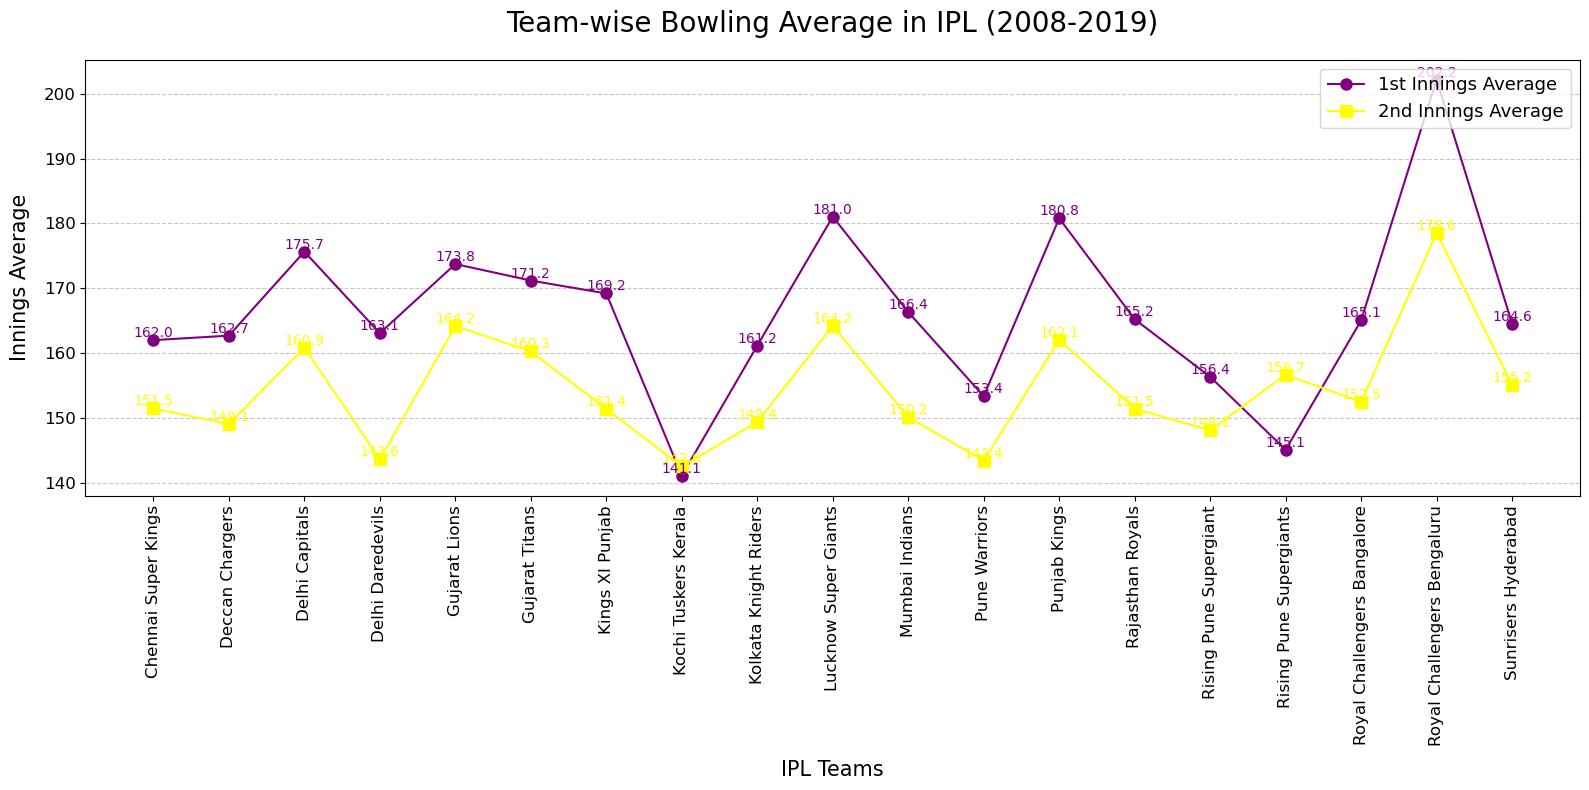

In [127]:
first_innins_score = file[file['inning'] == 1]
team_innings_score = first_innins_score.groupby(['bowling_team', 'match_id']).apply(lambda x: np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_score_avg = team_innings_score.groupby('bowling_team').apply(lambda x: np.mean(x['Innings Total'])).reset_index(name='Innings Average')

second_innins_score = file[file['inning'] == 2]
team_innings_second_score = second_innins_score.groupby(['bowling_team', 'match_id']).apply(lambda x: np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_second_innings_score_avg = team_innings_second_score.groupby('bowling_team').apply(lambda x: np.mean(x['Innings Total'])).reset_index(name='Innings Average')

plt.figure(figsize=(16, 8))
plt.plot(team_innings_score_avg['bowling_team'], team_innings_score_avg['Innings Average'], color='purple', marker='o', markersize=8, label='1st Innings Average')
plt.plot(team_second_innings_score_avg['bowling_team'], team_second_innings_score_avg['Innings Average'], color='yellow', marker='s', markersize=8, label='2nd Innings Average')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('IPL Teams', fontsize=15, labelpad=10)
plt.ylabel('Innings Average', fontsize=15, labelpad=10)
plt.title('Team-wise Bowling Average in IPL (2008-2019)', fontsize=20, pad=20)
plt.legend(fontsize=13, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, avg in enumerate(team_innings_score_avg['Innings Average']):
    plt.text(i, avg, f'{avg:.1f}', ha='center', va='bottom', fontsize=10, color='purple')

for i, avg in enumerate(team_second_innings_score_avg['Innings Average']):
    plt.text(i, avg, f'{avg:.1f}', ha='center', va='bottom', fontsize=10, color='yellow')

plt.tight_layout()
plt.show()


# Win by Runs/Win by Wickets- Team wise Average

In [ ]:
# Teams Average winning by Runs/Wickets Summary

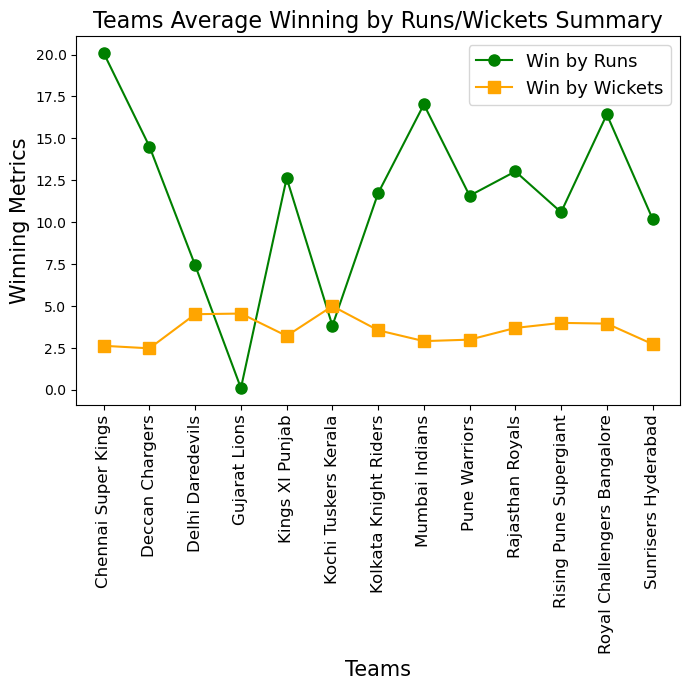

In [128]:
win_runs = file2.groupby('winner').apply(lambda x: np.average(x['win_by_runs'])).reset_index(name='Win By Runs Average')
win_wickets = file2.groupby('winner').apply(lambda x: np.average(x['win_by_wickets'])).reset_index(name='Win By Wickets Average')

plt.figure(figsize=(7, 7))
plt.plot(win_runs['winner'], win_runs['Win By Runs Average'], color='green', marker='o', markersize=8, label='Win by Runs')
plt.plot(win_wickets['winner'], win_wickets['Win By Wickets Average'], color='orange', marker='s', markersize=8, label='Win by Wickets')

plt.xlabel('Teams', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Winning Metrics', fontsize=15)
plt.legend(fontsize=13)
plt.title('Teams Average Winning by Runs/Wickets Summary', fontsize=16)

plt.tight_layout()
plt.show()

# Head to Head Match Analysis between the Teams of IPL

PS. We have only kept the teams that are currently existing in the IPL'20. The Teams which had been a part of the Tournament previously and is not existing anymore- have been excluded- since their contribution would not be significant anymore

In [45]:
Current_teams=['Chennai Super Kings','Mumbai Indians','Rajasthan Royals','Delhi Capitals','Sunrisers Hyderabad','Kolkata Knight Riders','Royal Challengers Bangalore','Kings XI Punjab']
team_1_filter=file2[file2.team1.isin(Current_teams)]
team_2_filter=team_1_filter[team_1_filter.team2.isin(Current_teams)]
teams_filter=team_2_filter[team_2_filter.winner.isin(Current_teams)]
head_to_head_matches=teams_filter.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Winning Counts')
head_to_head_matches['Game']=head_to_head_matches['team1']+' vs. '+head_to_head_matches['team2']
head_to_head_matches.loc[:,['Game','winner','Winning Counts']]
heatmap1_data = pd.pivot_table(head_to_head_matches, values='Winning Counts', 
                     index=['Game'], 
                     columns='winner')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g=sns.heatmap(heatmap1_data,annot=True, cmap="YlGnBu",fmt='g')
ax.set_title('The Head-to-Head Performace Matrix of Teams in IPL',size=20)
ax.set_xlabel('IPL Teams',size=15)
ax.set_ylabel('Match',size=15)

Text(33.2222222222222, 0.5, 'Match')

<Figure size 640x480 with 0 Axes>

# Team wise winning Performance at Venues

In [130]:
venue_win = file2.groupby(['venue', 'winner']).apply(lambda x: x['winner'].count()).reset_index(name='Match Wins')
venue_win_pvt = pd.pivot(venue_win, values='Match Wins', index='venue', columns='winner')
venue_win_pvt = venue_win_pvt.replace(np.NaN, 0)

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.2)
htmp = sns.heatmap(venue_win_pvt, annot=True, fmt='g', cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Match Wins'})

plt.xlabel('Teams', fontsize=25)
plt.ylabel('Venues', fontsize=25)
plt.title('Team-wise Wins at the Venues', fontsize=45)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Venue wise Best Performers

Text(0.5, 1.0, 'Players with the Best Performance at Venues')

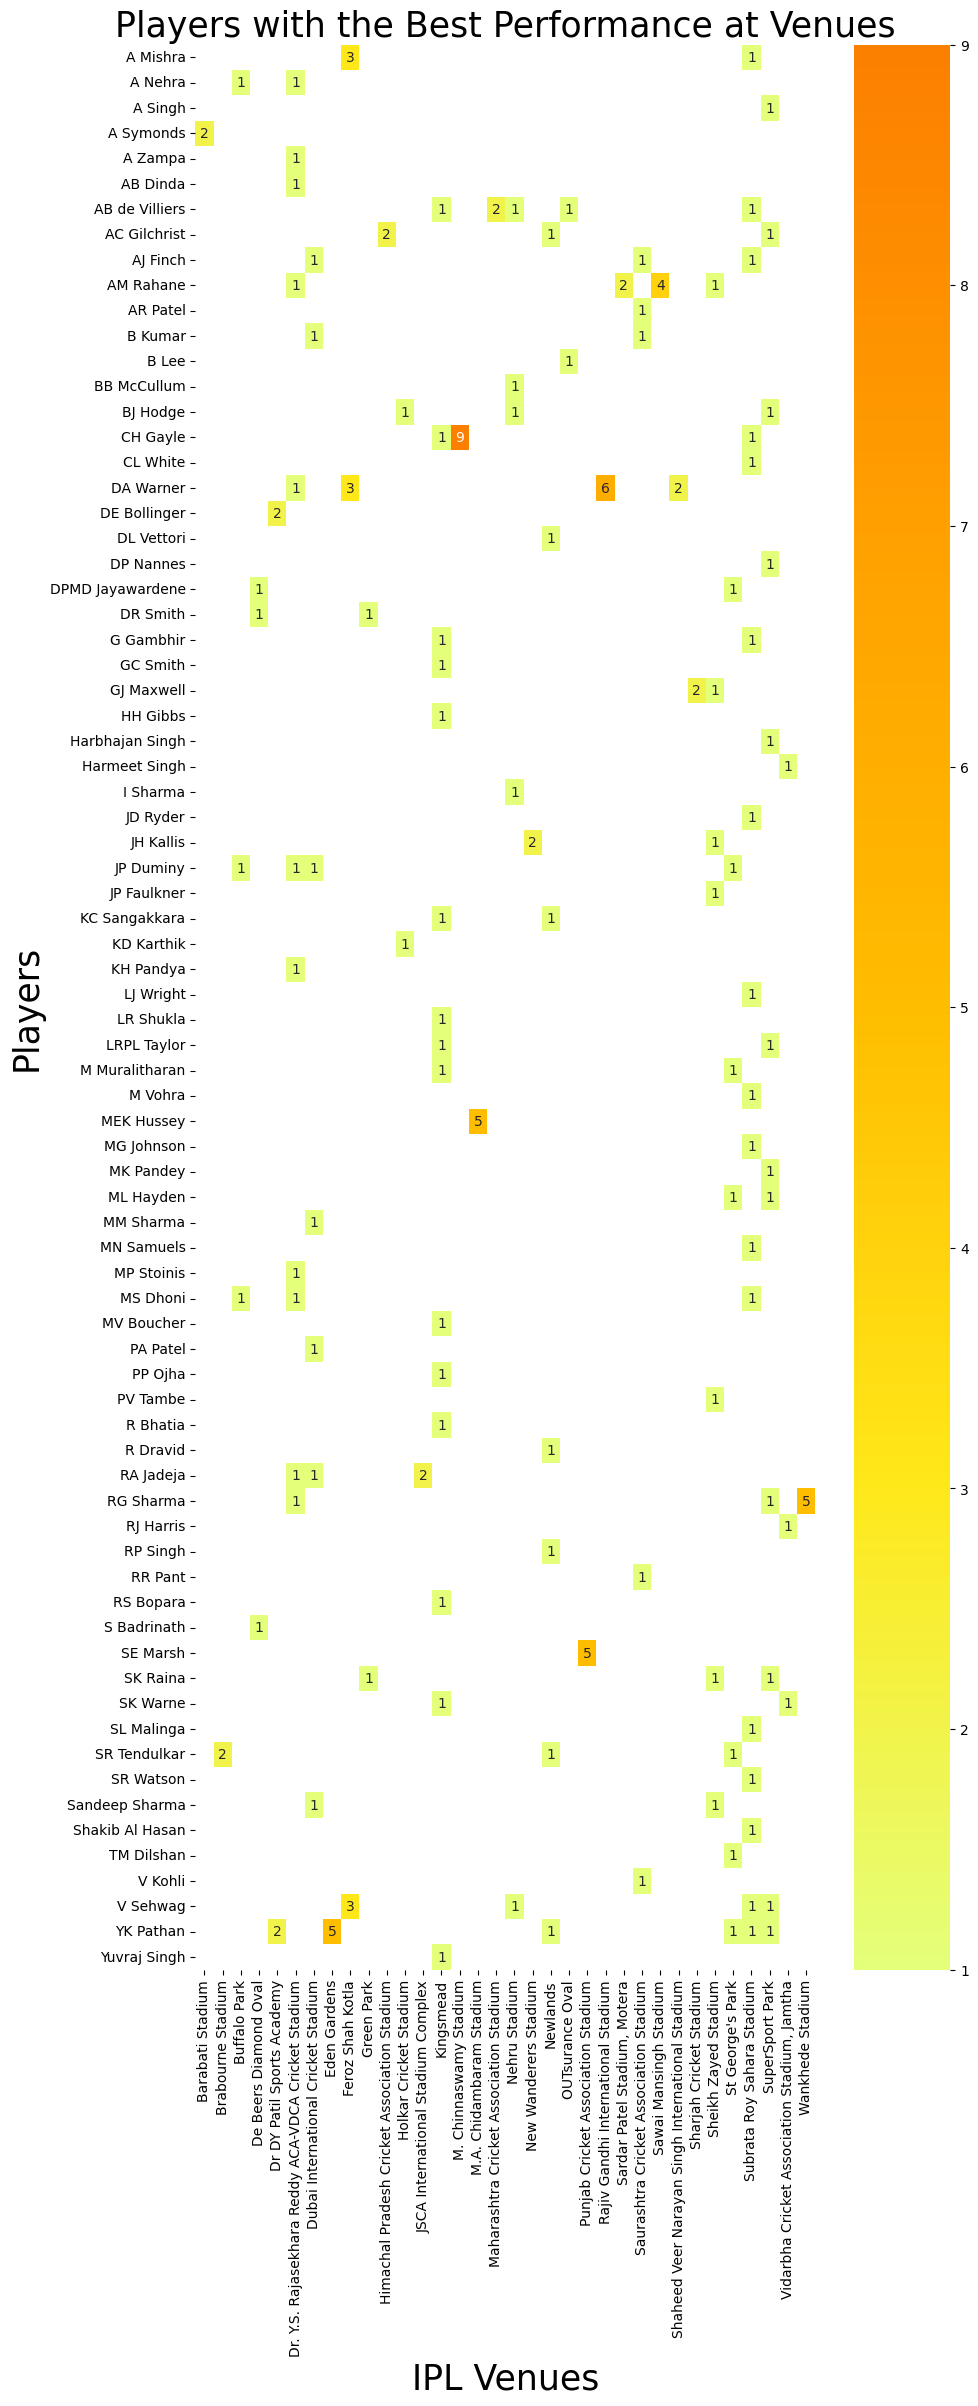

In [47]:
venue_mom=file2.groupby(['venue','player_of_match']).apply(lambda x:x['player_of_match'].count()).reset_index(name='MoM_Winner')
venue_mom_sort=venue_mom.sort_values(by=['venue','MoM_Winner'],ascending=[True,False])
venue_mom_count_max=venue_mom_sort.groupby(['venue']).apply(lambda x:np.max(x['MoM_Winner'])).reset_index(name='MoM_Winner')
venue_best=pd.merge(venue_mom,venue_mom_count_max,how='inner',left_on=['venue','MoM_Winner'],right_on=['venue','MoM_Winner'])
venue_best_multiple_pivot=pd.pivot(venue_best,values='MoM_Winner',index='player_of_match',columns='venue')
plt.figure(figsize=(10,25))
sns.heatmap(venue_best_multiple_pivot,annot=True,fmt='g',cmap='Wistia')
plt.xlabel('IPL Venues',size=25)
plt.ylabel('Players',size=25)
plt.title('Players with the Best Performance at Venues',size=25)

# The Toss Decisions taken by Venue Heatmap-in IPL

In [132]:
venue_toss = teams_filter.groupby(['venue', 'toss_decision']).apply(lambda x: x['toss_decision'].count()).reset_index(name='Toss Decision Counts')

heatmap2_data = pd.pivot_table(venue_toss, values='Toss Decision Counts', 
                               index=['venue'], columns='toss_decision')

plt.figure(figsize=(15, 10))
sns.set(font_scale=1.2)
g = sns.heatmap(heatmap2_data, annot=True, fmt='g', cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Toss Decision Counts'})

g.xaxis.set_ticks_position("top")
g.set_title('Toss Decisions Taken by Venue Heatmap - IPL', fontsize=20)
g.set_xlabel('Toss Decision', fontsize=15)
g.set_ylabel('Venue', fontsize=15)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Analyzing the Impact of Toss- The team winning Toss winning/losing the match- Venue and decision level analysis

In [133]:
venue_toss_result = teams_filter.groupby(['venue', 'toss_decision']).apply(
    lambda x: np.sum(np.where(x['toss_winner'] == x['winner'], 1, 0))
).reset_index(name='Toss Winner Wins Match')

venue_toss_counts = teams_filter.groupby(['venue', 'toss_decision']).apply(
    lambda x: x['toss_decision'].count()
).reset_index(name='Toss Decision Counts')

merged_venue_data = pd.merge(venue_toss_result, venue_toss_counts, 
                              how='inner', left_on=['venue', 'toss_decision'], 
                              right_on=['venue', 'toss_decision'])

merged_venue_data['Toss Winner Lose Match'] = merged_venue_data['Toss Decision Counts'] - merged_venue_data['Toss Winner Wins Match']

merged_data_arranged = merged_venue_data.loc[:, ['venue', 'toss_decision', 'Toss Decision Counts', 
                                                 'Toss Winner Wins Match', 'Toss Winner Lose Match']]

merged_data_arranged


venue toss_decision  \
0                                    Barabati Stadium         field   
1                                   Brabourne Stadium           bat   
2                                   Brabourne Stadium         field   
3                                        Buffalo Park           bat   
4                               De Beers Diamond Oval           bat   
5                          Dr DY Patil Sports Academy           bat   
6                          Dr DY Patil Sports Academy         field   
7   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...           bat   
8   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...         field   
9                 Dubai International Cricket Stadium           bat   
10                Dubai International Cricket Stadium         field   
11                                       Eden Gardens           bat   
12                                       Eden Gardens         field   
13                                   Feroz Shah Kotla           bat   
14                                   Feroz Shah Kotla         field   
15       Himachal Pradesh Cricket Association Stadium           bat   
16       Himachal Pradesh Cricket Association Stadium         field   
17                 JSCA International Stadium Complex           bat   
18                 JSCA International Stadium Complex         field   
19                                          Kingsmead           bat   
20                                          Kingsmead         field   
21                             M. Chinnaswamy Stadium           bat   
22                             M. Chinnaswamy Stadium         field   
23                           M.A. Chidambaram Stadium           bat   
24                           M.A. Chidambaram Stadium         field   
25            Maharashtra Cricket Association Stadium           bat   
26            Maharashtra Cricket Association Stadium         field   
27                              New Wanderers Stadium           bat   
28                              New Wanderers Stadium         field   
29                                           Newlands           bat   
30                                           Newlands         field   
31                 Punjab Cricket Association Stadium           bat   
32                 Punjab Cricket Association Stadium         field   
33                 Rajiv Gandhi International Stadium           bat   
34                 Rajiv Gandhi International Stadium         field   
35                       Sardar Patel Stadium, Motera           bat   
36                       Sardar Patel Stadium, Motera         field   
37                             Sawai Mansingh Stadium           bat   
38                             Sawai Mansingh Stadium         field   
39                            Sharjah Cricket Stadium           bat   
40                            Sharjah Cricket Stadium         field   
41                               Sheikh Zayed Stadium           bat   
42                               Sheikh Zayed Stadium         field   
43                                   St George's Park           bat   
44                                    SuperSport Park           bat   
45                                    SuperSport Park         field   
46                                   Wankhede Stadium           bat   
47                                   Wankhede Stadium         field   

    Toss Decision Counts  Toss Winner Wins Match  Toss Winner Lose Match  
0                      3                       2                       1  
1                      4                       2                       2  
2                      4                       3                       1  
3                      1                       1                       0  
4                      1                       0                       1  
5                      2                       2                       0  
6                      2                   

# Heatmap representation of the Win/Loss Analysis by Venue and Toss Decision

Text(70.72222222222219, 0.5, 'Stadium')

<Figure size 640x480 with 0 Axes>

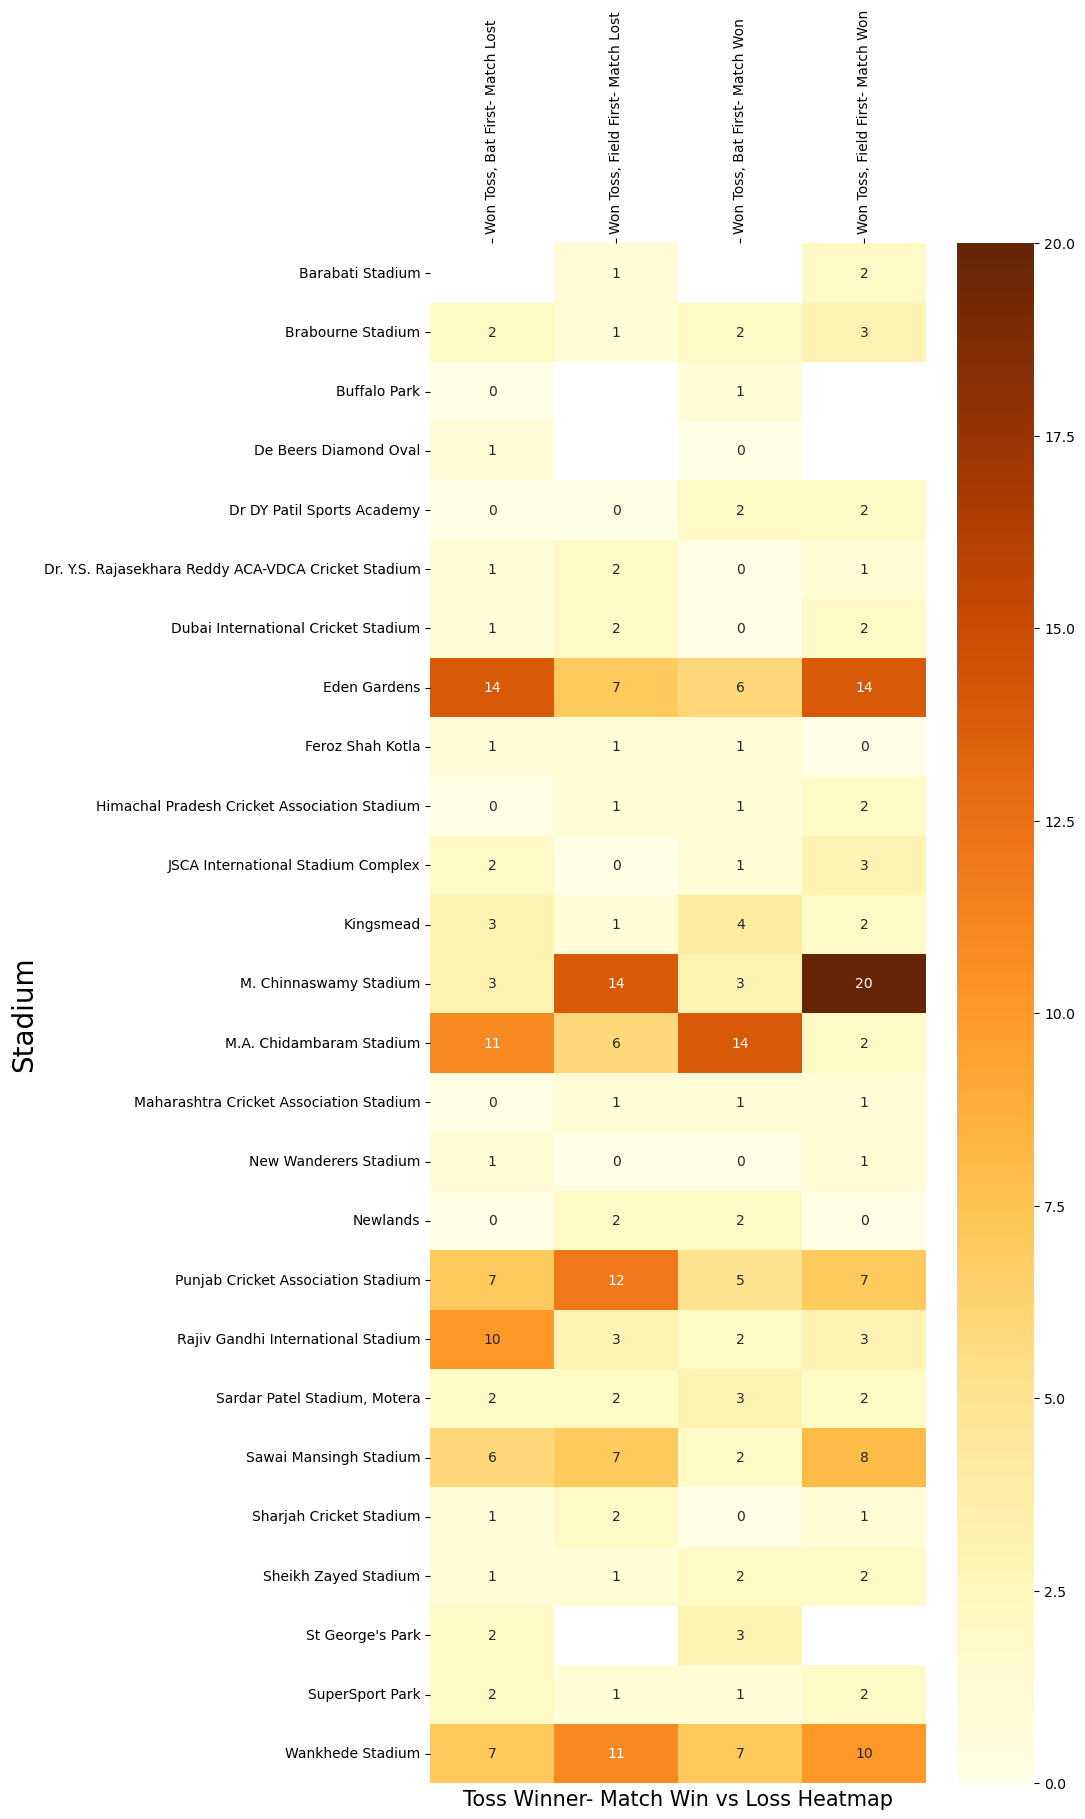

In [50]:
heatmap3_data = pd.pivot_table(merged_venue_data, values=['Toss Winner Wins Match','Toss Winner Lose Match'], 
                     index=['venue'], 
                     columns='toss_decision')
fig=plt.figure()
fig,ax1=plt.subplots(1,1,figsize=(8,20))
g=sns.heatmap(heatmap3_data,annot=True,cmap='YlOrBr',fmt='g')
g.xaxis.set_ticks_position("top")
g.set_xticklabels(['Won Toss, Bat First- Match Lost','Won Toss, Field First- Match Lost','Won Toss, Bat First- Match Won','Won Toss, Field First- Match Won'],rotation=90)
g.set_xlabel('Toss Winner- Match Win vs Loss Heatmap',size=15)
g.set_ylabel('Stadium',size=20)